# Title: Unveiling Hypergraphs: From Visualisation to Neural Networks Applications

## Table of Contents
* [Imports](#chapter1)
* [Data Import](#chapter2)
    * [Cuisine dataset](#section_2_1)
    * [Emergency Room dataset](#section_2_2)
    * [Co-authorship dataset](#section_2_3)
* [Data Exploration](#chapter3)
    * [Cuisine dataset](#section_3_1)
    * [Emergency Room dataset](#section_3_2)
    * [Co-authorship dataset](#section_3_3)
* [Models](#chapter4)
    * [ANN](#section_4_1)
        * [ANN: first model](#section_4_1_1)
        * [ANN: Parameteres' tuning](#section_4_1_2)
        * [ANN: second model with tuned parameteres](#section_4_1_3)
    * [CNN](#section_4_2)
        * [CNN: first model](#section_4_2_1)
        * [CNN: Parameteres' tuning](#section_4_2_2)
        * [CNN: second model with tuned parameteres](#section_4_2_3)
    * [RNN](#section_4_3)
        * [RNN: first model](#section_4_3_1)
        * [RNN: Parameteres' tuning](#section_4_3_2)
        * [RNN: second model with tuned parameteres](#section_4_3_3)
    * [HyperedgeClassifier](#section_4_4)
        * [HyperedgeClassifier: first model](#section_4_4_1)
        * [HyperedgeClassifier: Parameteres' tuning](#section_4_4_2)
        * [HyperedgeClassifier: second model with tuned parameteres](#section_4_4_3)
     * [LinkPredictor](#section_4_5)
        * [LinkPredictor: first model](#section_4_5_1)
        * [LinkPredictor: Parameteres' tuning](#section_4_5_2)
        * [LinkPredictor: Cuisine Dataset](#section_4_5_3)
        * [LinkPredictor: Emergency Room Dataset](#section_4_5_4)
        * [LinkPredictor: Co-authorship Dataset](#section_4_5_5)
   
   

# Imports <a class="anchor" id="chapter1"></a>

In [4]:
import matplotlib.pyplot as plt
from collections import Counter
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.preprocessing import label_binarize
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import itertools
from torchviz import make_dot
import torch.optim as optim
from itertools import product
from tensorflow.keras.layers import Dropout
import xgi
import numpy as np

pip install torch
pip install xgi
pip install torchviz

# Data Import <a class="anchor" id="chapter2"></a>

### Cuisine dataset  <a class="anchor" id="section_2_1"></a>

In [5]:
#importing first dataset from https://www.cs.cornell.edu/
edges_cuisine= []

with open("hyperedges-cuisine.txt", 'r') as file:
    for line in file:
        values = list(map(int, line.split()))
        edges_cuisine.append(values)


In [6]:
if None in edges_cuisine:
    print("The list has missing values.")
else:
    print("The list does not have missing values.")

The list does not have missing values.


In [8]:
file_path = "hyperedge-labels-cuisine.txt"  

# Open the file in read mode
with open(file_path, 'r') as file:
    lines = file.readlines()  # Read all lines of the file

# Process each line and split the values
labels_cuisine = []
for line in lines:
    line = line.strip()  # Remove leading/trailing whitespaces
    item = line.split()  # Split the line into individual items
    if item:  # Check if the list is not empty
        labels_cuisine.append(int(item[0]))  # Add the first item from the list to the result_list

In [9]:
if None in labels_cuisine:
    print("The list has missing values.")
else:
    print("The list does not have missing values.")

The list does not have missing values.


In [10]:
with open("nodes-cuisine-labels-text.txt") as f:
    labels_cuisine_names = f.readlines()
labels_cuisine_names[:10]
labels_cuisine_names2 = [item.rstrip('\n') for item in labels_cuisine_names]

cuisine_nodes_dictionary = {}
for i, item in enumerate(labels_cuisine_names2, 1):
    cuisine_nodes_dictionary[i] = item


In [13]:
edges_cuisine_named = [[cuisine_nodes_dictionary.get(key) for key in sublist] for sublist in edges_cuisine]

In [14]:
with open("edges-cuisine-labels-text.txt") as f:
    edges_cuisine_names = f.readlines()
edges_cuisine_names[:10]
edges_cuisine_names2 = [item.rstrip('\n') for item in edges_cuisine_names]

print(edges_cuisine_names2[:10])
cuisine_edges_dictionary = {}
for i, item in enumerate(edges_cuisine_names2, 1):
    cuisine_edges_dictionary[i] = item
cuisine_edges_dictionary

['korean', 'russian', 'vietnamese', 'filipino', 'brazilian', 'indian', 'mexican', 'moroccan', 'southern_us', 'irish']


{1: 'korean',
 2: 'russian',
 3: 'vietnamese',
 4: 'filipino',
 5: 'brazilian',
 6: 'indian',
 7: 'mexican',
 8: 'moroccan',
 9: 'southern_us',
 10: 'irish',
 11: 'thai',
 12: 'british',
 13: 'chinese',
 14: 'japanese',
 15: 'french',
 16: 'greek',
 17: 'spanish',
 18: 'cajun_creole',
 19: 'jamaican',
 20: 'italian'}

In [15]:
cuisine_labels_named = [cuisine_edges_dictionary[label] for label in labels_cuisine]

In [16]:
# Create a new list to store the updated data
edges_cuisine_named_with_labels = []

# Iterate over each edge and its corresponding label
for edge, label in zip(edges_cuisine_named , cuisine_labels_named):
    # Create a dictionary with 'ingredients' and 'label' keys
    recipe = {
        'ingredients': edge,
        'label': label
    }
    # Add the recipe to the new list
    edges_cuisine_named_with_labels.append(recipe)

## Emergency Room dataset <a class="anchor" id="section_2_2"></a>

In [11]:
# importing second dataset from https://www.cs.cornell.edu/
edges_dawn= []

with open("hyperedges-dawn.txt", 'r') as file:
    for line in file:
        values = list(map(int, line.split()))
        edges_dawn.append(values)
print(edges_dawn[:10])
len(edges_dawn)

[[179, 2310], [43, 140, 166, 222, 224, 283, 468, 548, 569, 876, 1202, 1203, 1235, 1547, 1659, 2108], [303, 901, 1016], [624, 1179], [285, 865, 1253, 1254, 2222, 2545], [85, 1204], [139, 569, 1215], [285, 876, 1016], [179, 339, 553, 865, 1526], [539, 865, 1705]]


87104

In [12]:
if None in edges_dawn:
    print("The list has missing values.")
else:
    print("The list does not have missing values.")

The list does not have missing values.


## Co-authorship dataset <a class="anchor" id="section_2_3"></a>

In [13]:
#importing third dataset from https://www.cs.cornell.edu/
edges_papers= []

with open("hyperedges-papers.txt", 'r') as file:
    for line in file:
        values = list(map(int, line.split()))
        edges_papers.append(values)
print(edges_papers[:10])
len(edges_papers)

[[36025, 36026, 36027, 36028], [1985, 3478, 5995, 36947], [18731, 18733, 80535, 80536, 80537, 80538, 80539], [33963, 33964], [2732, 13887, 15342, 19856], [45910, 45911, 45912, 45913], [969, 21139, 59641], [5817, 5818, 5819, 5820, 5821, 5822], [7444, 7445, 7446], [9335, 48327, 48328]]


51889

In [14]:
if None in edges_papers:
    print("The list has missing values.")
else:
    print("The list does not have missing values.")

The list does not have missing values.


## Data Exploration <a class="anchor" id="chapter3"></a>

### Cuisine dataset <a class="anchor" id="section_3_1"></a>

In [20]:
# first ten edges, with the nodes they are containing
print(edges_cuisine[:10])

[[5930, 3243, 3671, 252, 2291, 1910, 4243, 2095, 5046], [1979, 1810, 4799, 5176, 3494, 836, 4905, 5565, 2454, 3689, 5990], [4905, 2291, 4799, 2387, 2440, 5635, 6530, 3311, 3013, 4578, 4335, 5965], [4910, 5990, 4215, 4799], [3240, 1327, 345, 4447, 678, 2524, 3689, 4335, 4799, 6428, 4910, 5043, 6319, 1256, 6585, 5262, 4531, 4617, 5984, 188], [1979, 20, 4335, 4905, 5880, 4799, 1922, 3689, 6700, 891, 3941, 2228], [5878, 4799, 4271, 2291, 252, 6126, 5408, 6057, 3985, 1452, 2, 188, 172], [20, 3969, 5308, 3976, 6700, 5878, 6605, 4905, 2228, 602], [5878, 1910, 5173, 6321, 5031, 2583, 779, 3494, 4799, 6508, 5700, 5408, 91], [3708, 662, 252, 2201, 6055, 6057]]


In [19]:
#number of edges
len(edges_cuisine)

39774

In [12]:
# first ten labels, with the nodes they are containing
print(labels_cuisine[:10])

[16, 9, 4, 6, 6, 19, 17, 20, 7, 20]


In [13]:
#number of edges' labels
print(len(labels_cuisine))

39774


In [14]:
print(edges_cuisine_named[:10])

[['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles'], ['plain flour', 'ground pepper', 'salt', 'tomatoes', 'ground black pepper', 'thyme', 'eggs', 'green tomatoes', 'yellow corn meal', 'milk', 'vegetable oil'], ['eggs', 'pepper', 'salt', 'mayonaise', 'cooking oil', 'green chilies', 'grilled chicken breasts', 'garlic powder', 'yellow onion', 'soy sauce', 'butter', 'chicken livers'], ['water', 'vegetable oil', 'wheat', 'salt'], ['black pepper', 'shallots', 'cornflour', 'cayenne pepper', 'onions', 'garlic paste', 'milk', 'butter', 'salt', 'lemon juice', 'water', 'chili powder', 'passata', 'oil', 'ground cumin', 'boneless chicken skinless thigh', 'garam masala', 'double cream', 'natural yogurt', 'bay leaf'], ['plain flour', 'sugar', 'butter', 'eggs', 'fresh ginger root', 'salt', 'ground cinnamon', 'milk', 'vanilla extract', 'ground ginger', 'powdered sugar', 'baking powder'], ['olive oil', 'salt', 

In [15]:
print(cuisine_labels_named[:10])

['greek', 'southern_us', 'filipino', 'indian', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'italian']


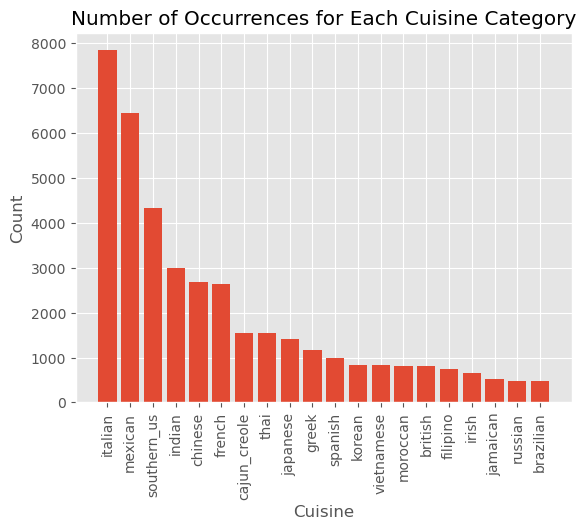

In [21]:
plt.style.use('ggplot')
# Count the number of occurrences for each cuisine category
cuisine_counts = {cuisine: cuisine_labels_named.count(cuisine) for cuisine in cuisine_labels_named}

# Sort the cuisine categories based on the counts in descending order
sorted_categories = sorted(cuisine_counts, key=cuisine_counts.get, reverse=True)
sorted_counts = [cuisine_counts[category] for category in sorted_categories]

# Create the bar chart
plt.bar(sorted_categories, sorted_counts)
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Number of Occurrences for Each Cuisine Category')
plt.xticks(rotation=90)

# Display the bar chart
plt.show()


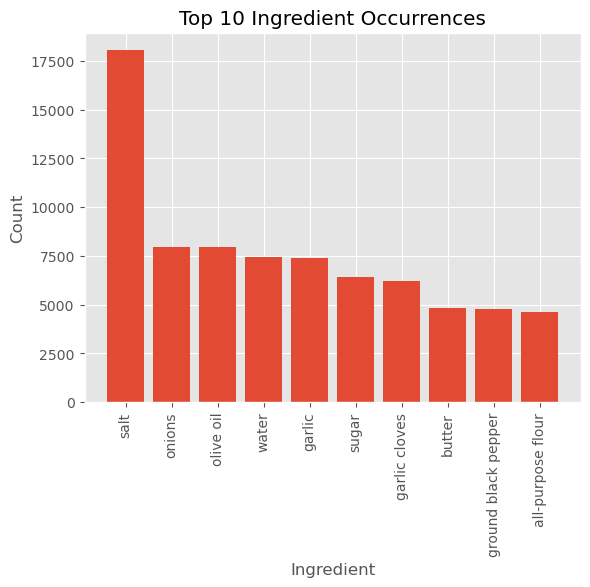

In [21]:
# Flatten the list of ingredients into a single list
all_ingredients = [ingredient for recipe in edges_cuisine_named for ingredient in recipe]

# Count the occurrences of each ingredient
ingredient_counts = Counter(all_ingredients)

# Get the top 10 ingredients and their counts
top_ingredients = ingredient_counts.most_common(10)
top_ingredients_names, top_ingredients_counts = zip(*top_ingredients)

# Create the bar chart
plt.bar(top_ingredients_names, top_ingredients_counts)
plt.xlabel('Ingredient')
plt.ylabel('Count')
plt.title('Top 10 Ingredient Occurrences')
plt.xticks(rotation=90)

# Display the bar chart
plt.show()


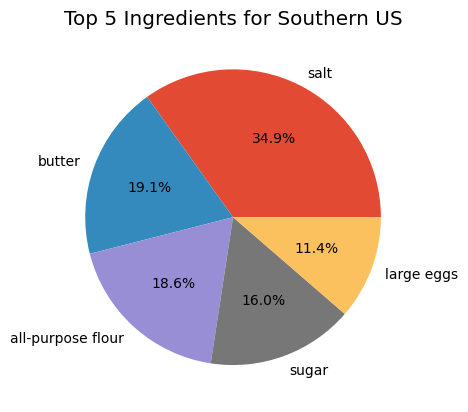

In [22]:
plt.style.use('ggplot')
# Filter recipes with the label 'italian'
italian_recipes = [recipe['ingredients'] for recipe in edges_cuisine_named_with_labels if recipe['label'] == 'southern_us']

# Count the occurrences of each ingredient in Italian recipes
ingredient_counts = Counter([ingredient for recipe in italian_recipes for ingredient in recipe])

# Select the top five ingredients
top_five_ingredients = ingredient_counts.most_common(5)

# Extract the ingredient names and occurrence counts
ingredients = [ingredient[0] for ingredient in top_five_ingredients]
counts = [ingredient[1] for ingredient in top_five_ingredients]

# Create the pie chart
plt.pie(counts, labels=ingredients, autopct='%1.1f%%')
plt.title('Top 5 Ingredients for Southern US')

# Display the pie chart
plt.show()


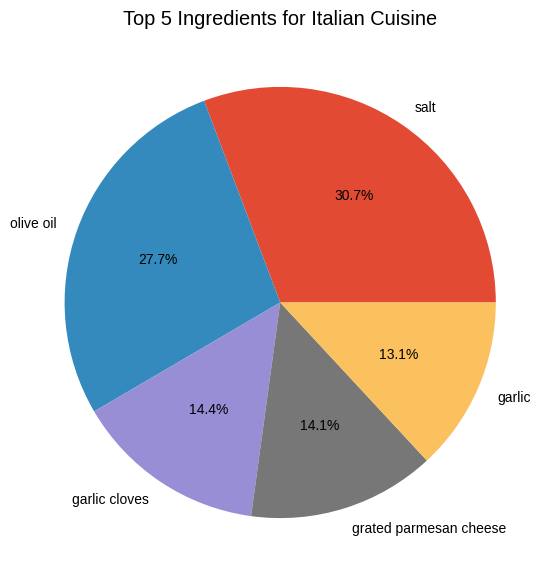

In [44]:
plt.style.use('ggplot')
# Filter recipes with the label 'italian'
italian_recipes = [recipe['ingredients'] for recipe in edges_cuisine_named_with_labels if recipe['label'] == 'italian']

# Count the occurrences of each ingredient in Italian recipes
ingredient_counts = Counter([ingredient for recipe in italian_recipes for ingredient in recipe])

# Select the top five ingredients
top_five_ingredients = ingredient_counts.most_common(5)

# Extract the ingredient names and occurrence counts
ingredients = [ingredient[0] for ingredient in top_five_ingredients]
counts = [ingredient[1] for ingredient in top_five_ingredients]

# Create the pie chart
plt.pie(counts, labels=ingredients, autopct='%1.1f%%')
plt.title('Top 5 Ingredients for Italian Cuisine')

# Display the pie chart
plt.show()


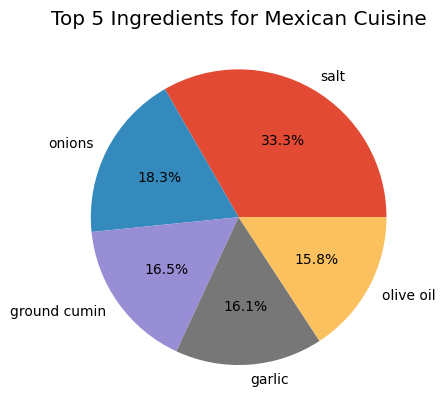

In [23]:
plt.style.use('ggplot')
# Filter recipes with the label 'italian'
italian_recipes = [recipe['ingredients'] for recipe in edges_cuisine_named_with_labels if recipe['label'] == 'mexican']

# Count the occurrences of each ingredient in Italian recipes
ingredient_counts = Counter([ingredient for recipe in italian_recipes for ingredient in recipe])

# Select the top five ingredients
top_five_ingredients = ingredient_counts.most_common(5)

# Extract the ingredient names and occurrence counts
ingredients = [ingredient[0] for ingredient in top_five_ingredients]
counts = [ingredient[1] for ingredient in top_five_ingredients]

# Create the pie chart
plt.pie(counts, labels=ingredients, autopct='%1.1f%%')
plt.title('Top 5 Ingredients for Mexican Cuisine')

# Display the pie chart
plt.show()


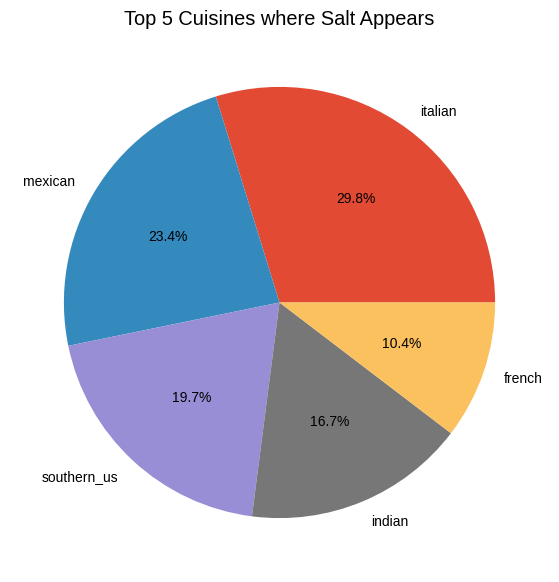

In [40]:
plt.style.use('ggplot')
# Filter recipes that contain the ingredient 'salt'
salt_recipes = [recipe for recipe in edges_cuisine_named_with_labels if 'salt' in recipe['ingredients']]

# Count the occurrences of each cuisine label in recipes with salt
cuisine_counts = Counter([recipe['label'] for recipe in salt_recipes])

# Select the top five cuisines
top_five_cuisines = cuisine_counts.most_common(5)

# Extract the cuisine names and occurrence counts
cuisines = [cuisine[0] for cuisine in top_five_cuisines]
counts = [cuisine[1] for cuisine in top_five_cuisines]

# Create the pie chart
plt.pie(counts, labels=cuisines, autopct='%1.1f%%')
plt.title('Top 5 Cuisines where Salt Appears')

# Display the pie chart
plt.show()


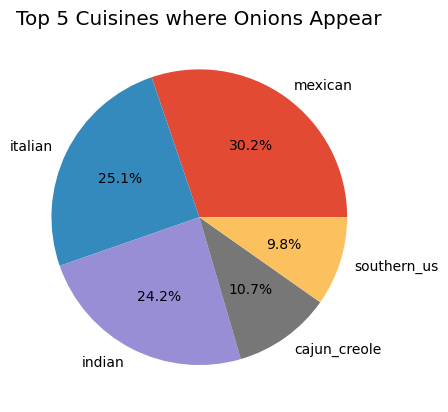

In [24]:
plt.style.use('ggplot')
# Filter recipes that contain the ingredient 'salt'
salt_recipes = [recipe for recipe in edges_cuisine_named_with_labels if 'onions' in recipe['ingredients']]

# Count the occurrences of each cuisine label in recipes with salt
cuisine_counts = Counter([recipe['label'] for recipe in salt_recipes])

# Select the top five cuisines
top_five_cuisines = cuisine_counts.most_common(5)

# Extract the cuisine names and occurrence counts
cuisines = [cuisine[0] for cuisine in top_five_cuisines]
counts = [cuisine[1] for cuisine in top_five_cuisines]

# Create the pie chart
plt.pie(counts, labels=cuisines, autopct='%1.1f%%')
plt.title('Top 5 Cuisines where Onions Appear')

# Display the pie chart
plt.show()


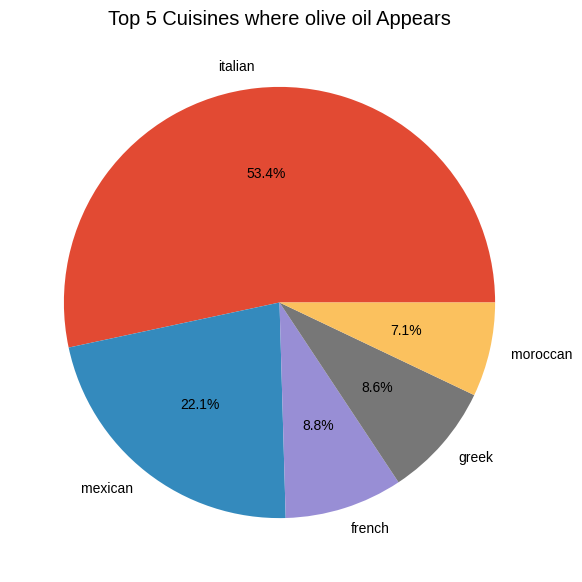

In [43]:
plt.style.use('ggplot')
# Filter recipes that contain the ingredient 'salt'
salt_recipes = [recipe for recipe in edges_cuisine_named_with_labels if 'olive oil' in recipe['ingredients']]

# Count the occurrences of each cuisine label in recipes with salt
cuisine_counts = Counter([recipe['label'] for recipe in salt_recipes])

# Select the top five cuisines
top_five_cuisines = cuisine_counts.most_common(5)

# Extract the cuisine names and occurrence counts
cuisines = [cuisine[0] for cuisine in top_five_cuisines]
counts = [cuisine[1] for cuisine in top_five_cuisines]

# Create the pie chart
plt.pie(counts, labels=cuisines, autopct='%1.1f%%')
plt.title('Top 5 Cuisines where olive oil Appears')

# Display the pie chart
plt.show()


In [31]:
#import data specifically for XGI software: https://xgi.readthedocs.io/en/stable/
file_path = "hyperedges-cuisine.txt" 

# Open the file in read mode
with open(file_path, 'r') as file:
    lines = file.readlines()  # Read all lines of the file

# Process each line and split the values
result_list_cuisine = []
for line in lines:
    line = line.strip()  # Remove leading/trailing whitespaces
    items = line.split()  # Split the line into individual items
    result_list_cuisine.append(items)  # Add the items as a list to the result_list
result_list_cuisine=result_list_cuisine[:10]

In [32]:
H = xgi.Hypergraph()
H.add_edges_from(
 result_list_cuisine  
)

In [33]:
pos = xgi.barycenter_spring_layout(H)

<AxesSubplot:>

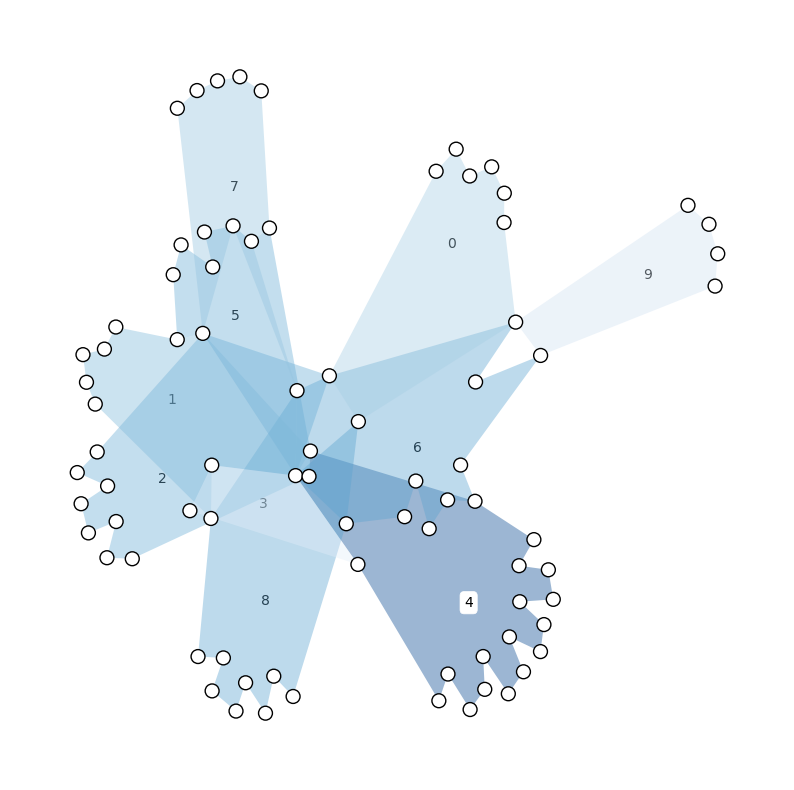

In [34]:
#visualise 10 hyperedges
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
xgi.draw(H, pos, node_size=10,hyperedge_labels=True, ax=ax)

In [35]:
# Calculate node degrees
node_degrees = [len(edge) for edge in edges_cuisine]

# Calculate minimal node degree
minimal_degree = min(node_degrees)

# Calculate maximum node degree
maximum_degree = max(node_degrees)

# Calculate average node degree
average_degree = sum(node_degrees) / len(node_degrees)

# Print the results
print("Minimal Node Degree:", minimal_degree)
print("Maximum Node Degree:", maximum_degree)
print("Average Node Degree:", average_degree)

Minimal Node Degree: 1
Maximum Node Degree: 65
Average Node Degree: 10.76771257605471


<AxesSubplot:>

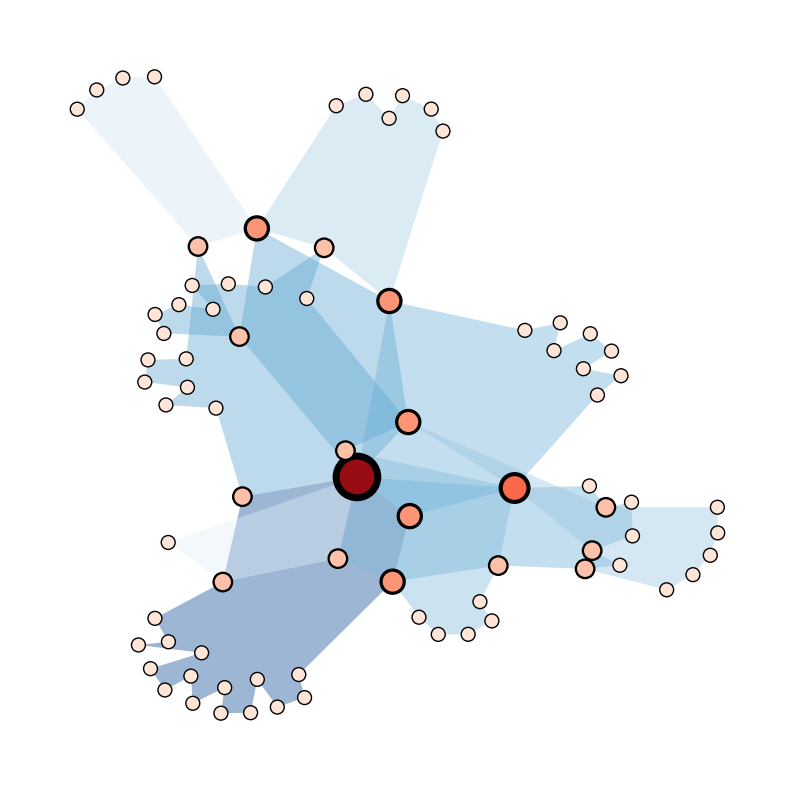

In [30]:
#visualise nodes' degrees
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
xgi.draw(
    H,
    pos,
    node_size=H.nodes.degree,
    node_lw=H.nodes.degree,
    node_fc=H.nodes.degree,
    ax=ax,
)

### Co-authorships dataset <a class="anchor" id="section_3_2"></a>

In [36]:
file_path = "hyperedges-papers.txt" 

# Open the file in read mode
with open(file_path, 'r') as file:
    lines = file.readlines()  # Read all lines of the file

# Process each line and split the values
result_list_papers = []
for line in lines:
    line = line.strip()  # Remove leading/trailing whitespaces
    items = line.split()  # Split the line into individual items
    result_list_papers.append(items)  # Add the items as a list to the result_list
result_list_papers.sort()
result_list_papers=result_list_papers[52:62]

In [37]:
H = xgi.Hypergraph()
H.add_edges_from(
 result_list_papers 
)
pos = xgi.barycenter_spring_layout(H)

<AxesSubplot:>

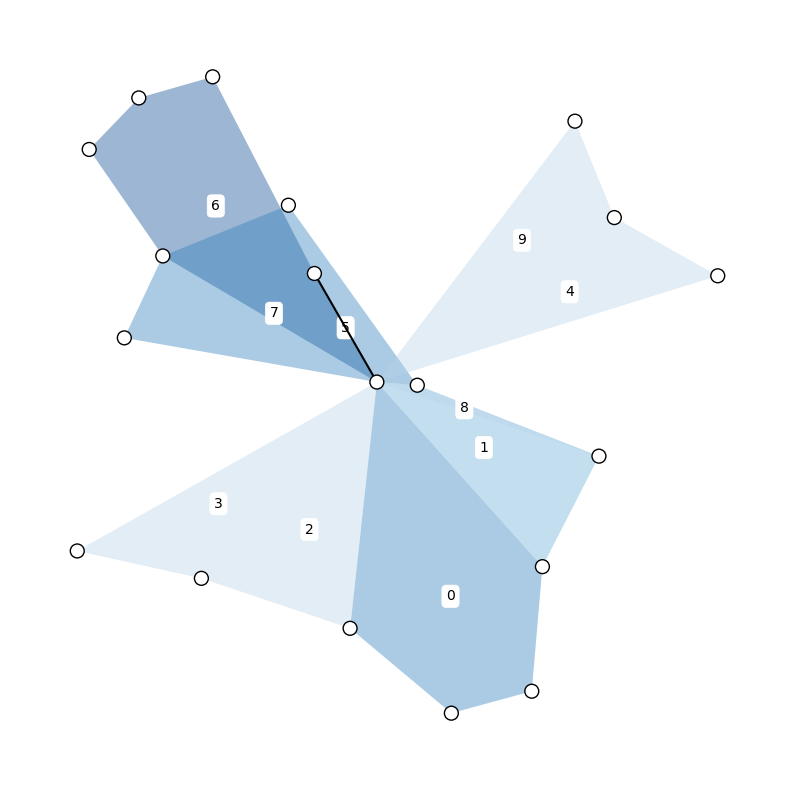

In [38]:
#visualise 10 hyperedges
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
xgi.draw(H, pos, node_size=10,hyperedge_labels=True, ax=ax)

In [39]:
# Calculate node degrees
node_degrees = [len(edge) for edge in edges_papers]

# Calculate minimal node degree
minimal_degree = min(node_degrees)

# Calculate maximum node degree
maximum_degree = max(node_degrees)

# Calculate average node degree
average_degree = sum(node_degrees) / len(node_degrees)

# Print the results
print("Minimal Node Degree:", minimal_degree)
print("Maximum Node Degree:", maximum_degree)
print("Average Node Degree:", average_degree)

Minimal Node Degree: 2
Maximum Node Degree: 25
Average Node Degree: 3.4829154541424967


<AxesSubplot:>

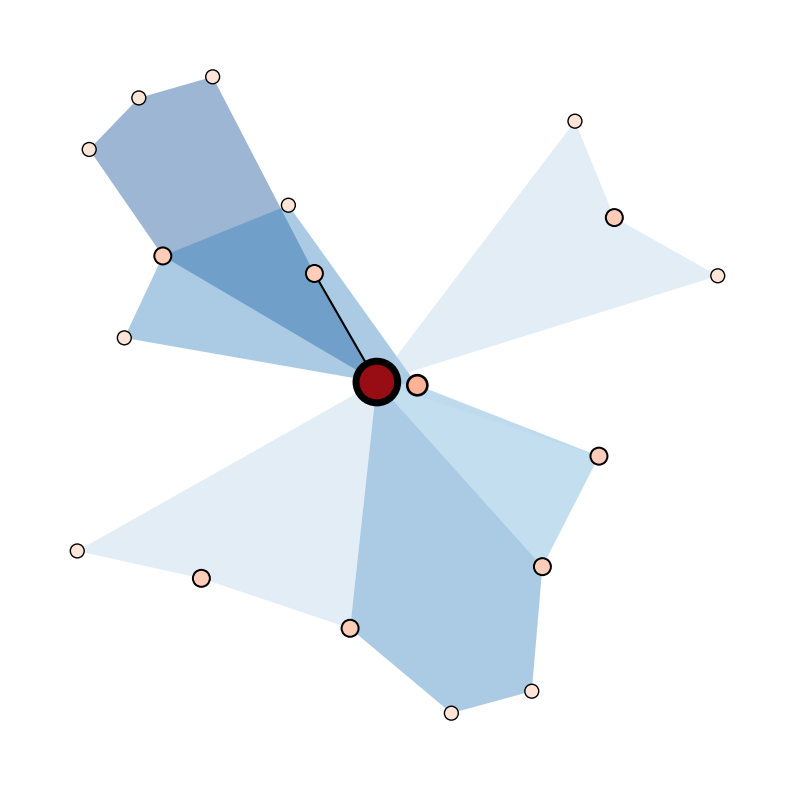

In [40]:
#visualise node degrees
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
xgi.draw(
    H,
    pos,
    node_size=H.nodes.degree,
    node_lw=H.nodes.degree,
    node_fc=H.nodes.degree,
    ax=ax,
)

### Emergency Room dataset <a class="anchor" id="section_3_3"></a>

<AxesSubplot:>

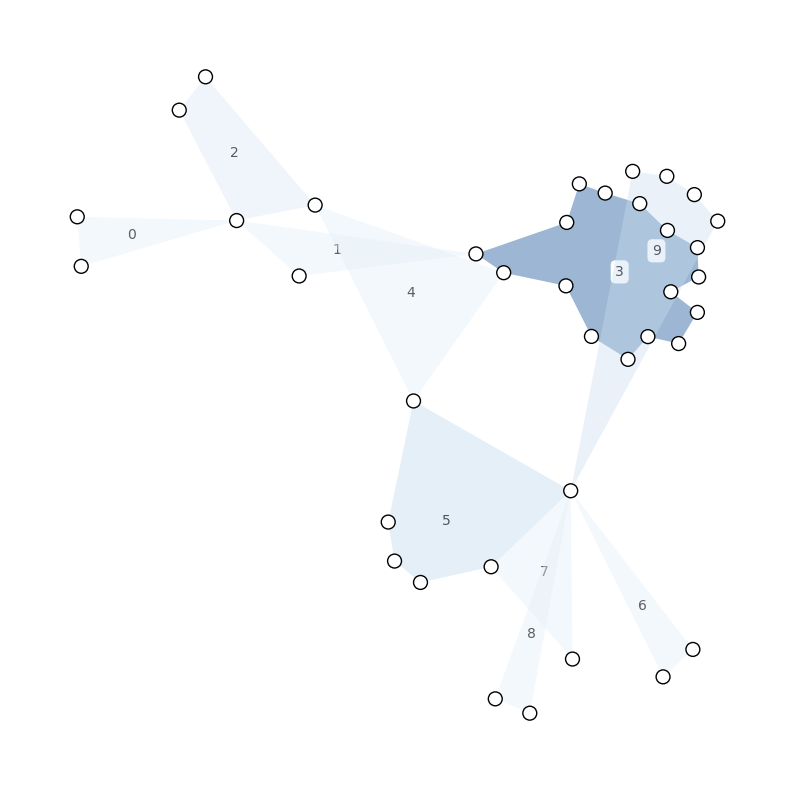

In [41]:
#visualise 10 hyperedges
file_path = "hyperedges-dawn.txt" 
# Open the file in read mode
with open(file_path, 'r') as file:
    lines = file.readlines()  # Read all lines of the file

# Process each line and split the values
result_list_dawn = []
for line in lines:
    line = line.strip()  # Remove leading/trailing whitespaces
    items = line.split()  # Split the line into individual items
    result_list_dawn.append(items)  # Add the items as a list to the result_list

result_list_dawn = [result_list_dawn[i] for i in [18,6,17,1,7,4,11,14,9,8]]

H = xgi.Hypergraph()
H.add_edges_from(
 result_list_dawn
)
pos = xgi.barycenter_spring_layout(H)
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
xgi.draw(H, pos, node_size=10,hyperedge_labels=True, ax=ax)

In [42]:
# Calculate node degrees
node_degrees = [len(edge) for edge in edges_dawn]

# Calculate minimal node degree
minimal_degree = min(node_degrees)

# Calculate maximum node degree
maximum_degree = max(node_degrees)

# Calculate average node degree
average_degree = sum(node_degrees) / len(node_degrees)

# Print the results
print("Minimal Node Degree:", minimal_degree)
print("Maximum Node Degree:", maximum_degree)
print("Average Node Degree:", average_degree)

Minimal Node Degree: 1
Maximum Node Degree: 22
Average Node Degree: 3.9359271675238796


<AxesSubplot:>

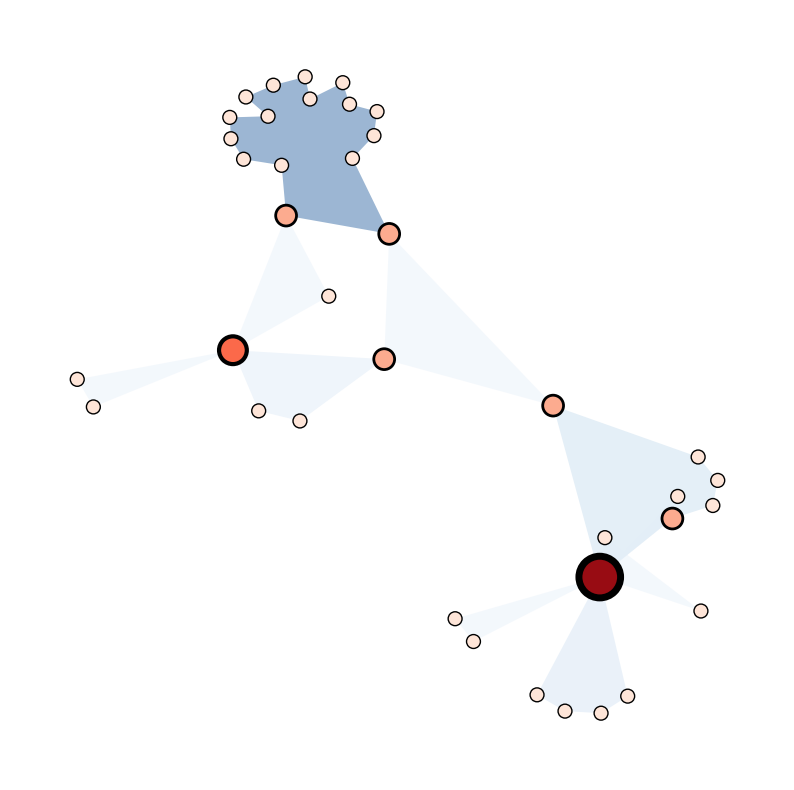

In [267]:
#visualise nodes' degrees
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
xgi.draw(
    H,
    pos,
    node_size=H.nodes.degree,
    node_lw=H.nodes.degree,
    node_fc=H.nodes.degree,
    ax=ax,
)

<AxesSubplot:>

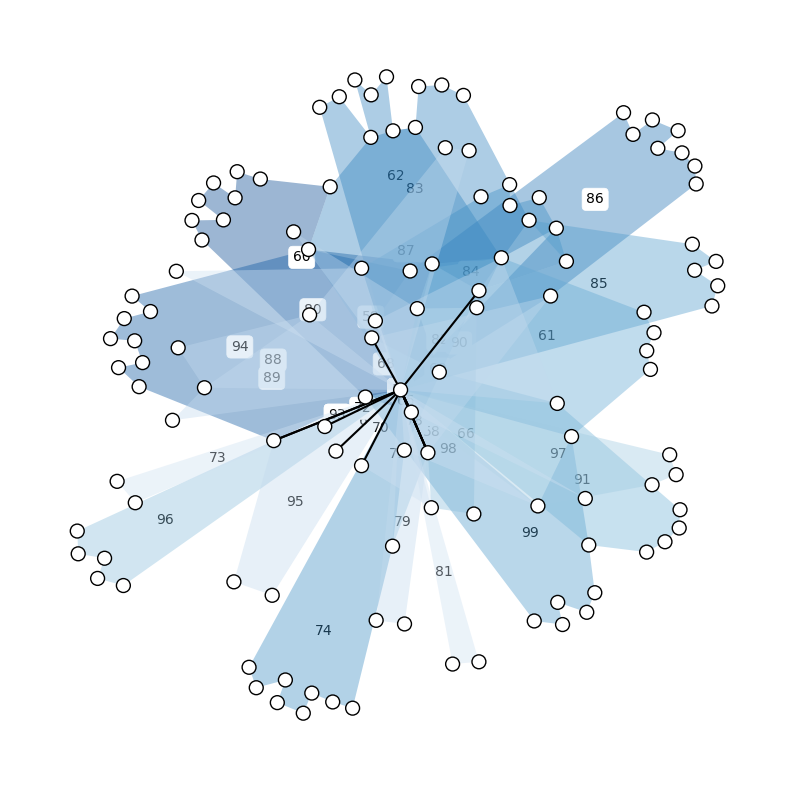

In [44]:
#visualise 10 hyperedges
file_path = "hyperedges-dawn.txt" 

# Open the file in read mode
with open(file_path, 'r') as file:
    lines = file.readlines()  # Read all lines of the file

# Process each line and split the values
result_list_dawn = []
for line in lines:
    line = line.strip()  # Remove leading/trailing whitespaces
    items = line.split()  # Split the line into individual items
    result_list_dawn.append(items)  # Add the items as a list to the result_list
result_list_dawn.sort()
result_list_dawn=result_list_dawn[:100]

H = xgi.Hypergraph()
H.add_edges_from(
 result_list_dawn
)
pos = xgi.barycenter_spring_layout(H)
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
xgi.draw(H, pos, node_size=10,hyperedge_labels=True, ax=ax)

<AxesSubplot:>

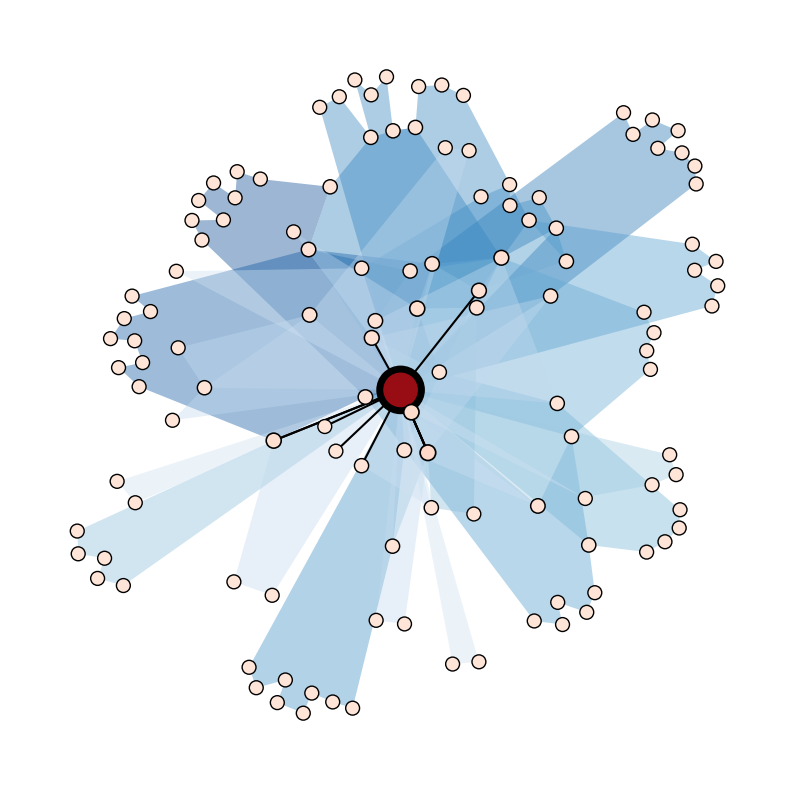

In [45]:
#visualise nodes' degrees
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
xgi.draw(
    H,
    pos,
    node_size=H.nodes.degree,
    node_lw=H.nodes.degree,
    node_fc=H.nodes.degree,
    ax=ax,
)

# Models <a class="anchor" id="chapter4"></a>

## ANN: <a class="anchor" id="section_4_1"></a>

### ANN: first model <a class="anchor" id="section_4_1_1"></a>

In [46]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
# Define hyperedges and labels
Hyperedges = edges_cuisine
HyperEdgesLabels = labels_cuisine

# Create a dictionary to map each node to a unique ID
node_to_id = {}
counter = 0
for edge in Hyperedges:
    for node in edge:
        if node not in node_to_id:
            node_to_id[node] = counter
            counter += 1

# Convert hyperedges and labels to numeric form using the node_to_id mapping
numeric_hyperedges = []
numeric_labels = []
for edge, label in zip(Hyperedges, HyperEdgesLabels):
    numeric_edge = [node_to_id[node] for node in edge]
    numeric_hyperedges.append(numeric_edge)
    numeric_labels.append(label)

# Pad the hyperedges to a fixed length 
max_edge_length = max(len(edge) for edge in numeric_hyperedges)
padded_hyperedges = tf.keras.preprocessing.sequence.pad_sequences(numeric_hyperedges, padding='post', maxlen=max_edge_length)

# Create one-hot encoded labels
num_classes = max(numeric_labels) + 1
one_hot_labels = tf.keras.utils.to_categorical(numeric_labels, num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_hyperedges, one_hot_labels, test_size=0.2, random_state=42)

# Define and train the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(node_to_id), 16, input_length=max_edge_length),
    tf.keras.layers.Flatten(),  # Flattening the 2D array to 1D
    tf.keras.layers.Dense(32, activation='relu'),  # ANN layer
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define a history callback
history_callback = tf.keras.callbacks.History()

# Train the model, saving its history
history = model.fit(x_train, y_train, epochs=100, callbacks=[history_callback])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision and recall
precision = precision_score(np.argmax(y_test, axis=1), y_pred_classes, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='weighted')

# Then you can access the loss, accuracy, etc. from the history object:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]


# Print the results
print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('Precision:', precision)
print('Recall:', recall)


2023-08-05 13:07:58.380264: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/anaconda/envs/Python3/lib:
2023-08-05 13:07:58.380314: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-05 13:07:58.380355: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cube-e740d1ec-4e20-4aba-9253-275e4d19d9d2-8674b9f79-lpzrd): /proc/driver/nvidia/version does not exist
2023-08-05 13:07:58.380663: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
995/995 [==============================] - 2s 2ms/step - loss: 2.0165 - accuracy: 0.3806
Epoch 2/100
995/995 [==============================] - 2s 2ms/step - loss: 1.3423 - accuracy: 0.5965
Epoch 3/100
995/995 [==============================] - 2s 2ms/step - loss: 1.1279 - accuracy: 0.6580
Epoch 4/100
995/995 [==============================] - 2s 2ms/step - loss: 0.9779 - accuracy: 0.7055
Epoch 5/100
995/995 [==============================] - 2s 2ms/step - loss: 0.8557 - accuracy: 0.7430
Epoch 6/100
995/995 [==============================] - 2s 2ms/step - loss: 0.7578 - accuracy: 0.7729
Epoch 7/100
995/995 [==============================] - 2s 2ms/step - loss: 0.6809 - accuracy: 0.7981
Epoch 8/100
995/995 [==============================] - 2s 2ms/step - loss: 0.6066 - accuracy: 0.8213
Epoch 9/100
995/995 [==============================] - 2s 2ms/step - loss: 0.5407 - accuracy: 0.8427
Epoch 10/100
995/995 [==============================] - 2s 2ms/step - loss: 0.4829 - accura

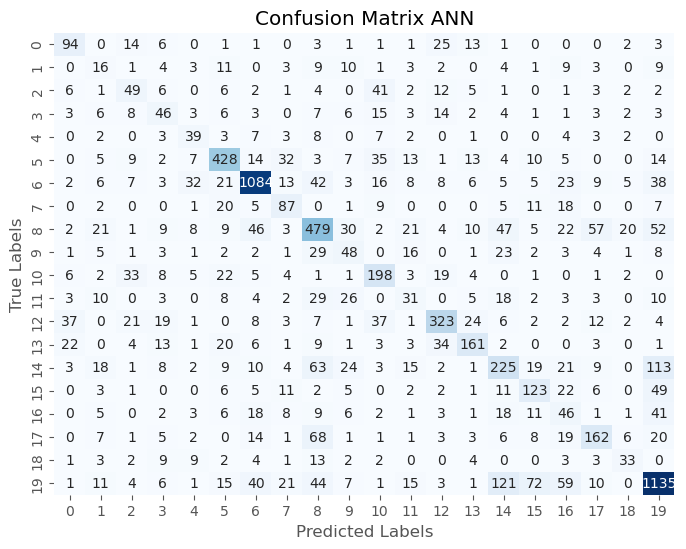

In [47]:
# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix ANN')
plt.show()

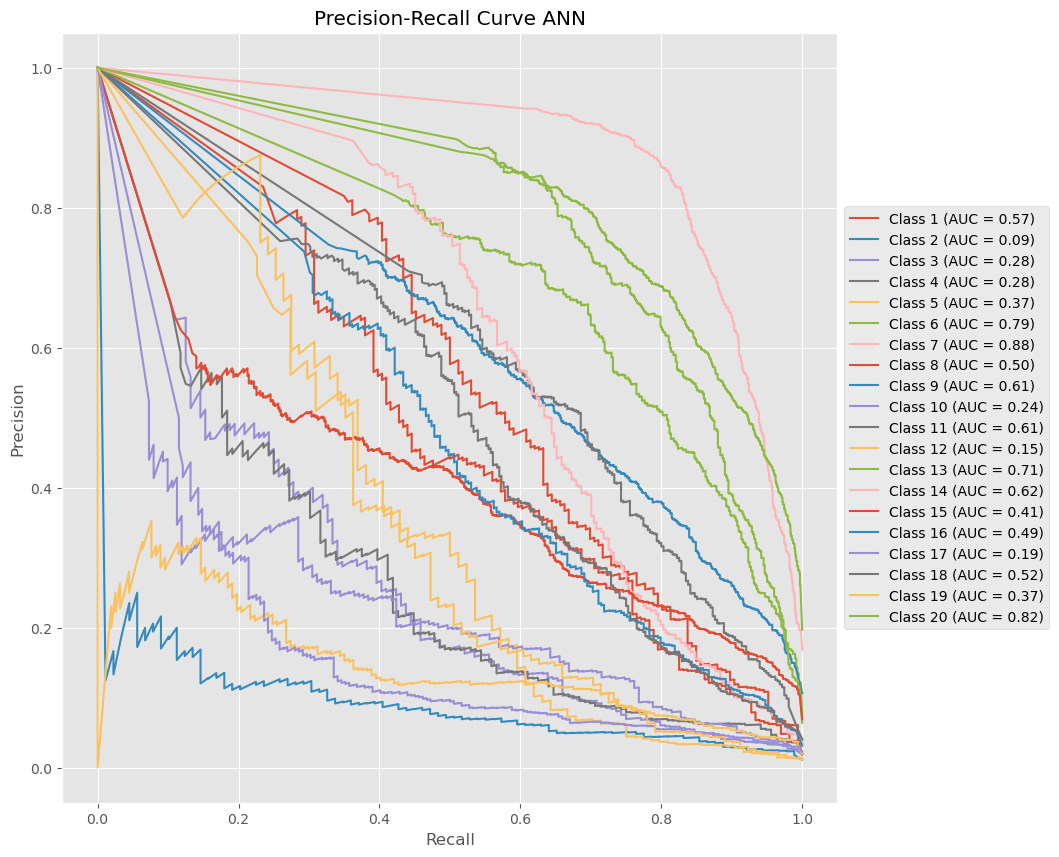

In [48]:
n_classes = y_test.shape[1]

# Define the figure size
plt.figure(figsize=(10, 10))

# For each class
for i in range(1, n_classes):
    # Compute precision-recall curve for class i
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
    # Compute area under the curve
    prc_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'Class {i} (AUC = {prc_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve ANN')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend outside of the plot
plt.show()


/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


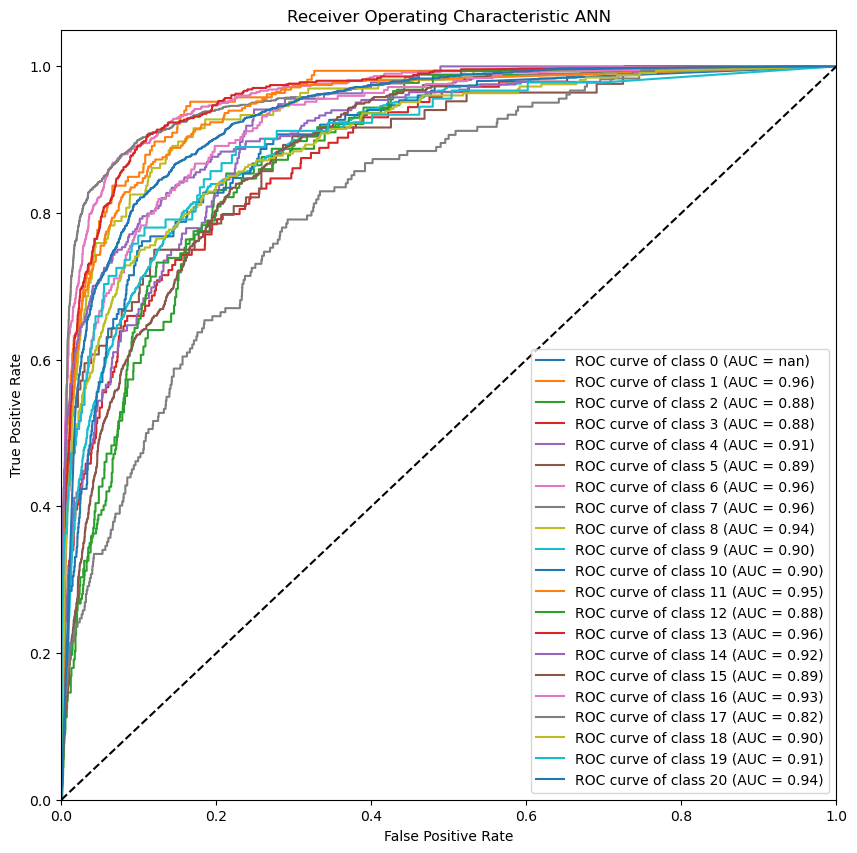

In [8]:
# Compute ROC curve and ROC area for each class
n_classes = y_test.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 10))  # Make the plot larger
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic ANN')
plt.legend(loc="lower right")
plt.show()


### ANN: parameters' tuning <a class="anchor" id="section_4_1_2"></a>

In [9]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
# Define hyperedges and labels
Hyperedges = edges_cuisine
HyperEdgesLabels = labels_cuisine

# Create a dictionary to map each node to a unique ID
node_to_id = {}
counter = 0
for edge in Hyperedges:
    for node in edge:
        if node not in node_to_id:
            node_to_id[node] = counter
            counter += 1

# Convert hyperedges and labels to numeric form using the node_to_id mapping
numeric_hyperedges = []
numeric_labels = []
for edge, label in zip(Hyperedges, HyperEdgesLabels):
    numeric_edge = [node_to_id[node] for node in edge]
    numeric_hyperedges.append(numeric_edge)
    numeric_labels.append(label)

# Pad the hyperedges to a fixed length
max_edge_length = max(len(edge) for edge in numeric_hyperedges)
padded_hyperedges = tf.keras.preprocessing.sequence.pad_sequences(numeric_hyperedges, padding='post', maxlen=max_edge_length)

# Create one-hot encoded labels
num_classes = max(numeric_labels) + 1
one_hot_labels = tf.keras.utils.to_categorical(numeric_labels, num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_hyperedges, one_hot_labels, test_size=0.2, random_state=42)

# Define the neural network model
def create_model(activation, dropout_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(len(node_to_id), 16, input_length=max_edge_length),
        tf.keras.layers.Flatten(),  # Flattening the 2D array to 1D
        tf.keras.layers.Dense(32, activation=activation),  # ANN layer
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(16, activation=activation),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the parameter grid for grid search
param_grid = {
    'activation': ['relu', 'sigmoid'],
    'dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [32, 64, 128],
    
}

# Create the model using KerasClassifier for compatibility with scikit-learn
model = tf.keras.wrappers.scikit_learn.KerasClassifier(create_model)

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(x_train, y_train, verbose=1)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)

# Predict probabilities on the test set
y_pred_prob = best_model.predict_proba(x_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Calculate the f1 score
f1 = f1_score(np.argmax(y_test, axis=1), y_pred_classes, average='weighted')

# Print the results
print('Test Accuracy:', test_accuracy)
print('F1 Score:', f1)


/tmp/ipykernel_3555/854158213.py:62: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(create_model)


995/995 [==============================] - 2s 2ms/step - loss: 2.0434 - accuracy: 0.3823
Best Parameters: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.2}
Best Score: 0.5141591529051462
249/249 [==============================] - 0s 881us/step - loss: 1.3973 - accuracy: 0.5911
Test Accuracy: 0.5910748243331909
F1 Score: 0.5191536994283448


### ANN: second model with tuned parameters <a class="anchor" id="section_4_1_3"></a>

In [49]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# Define hyperedges and labels
Hyperedges = edges_cuisine
HyperEdgesLabels = labels_cuisine

# Create a dictionary to map each node to a unique ID
node_to_id = {}
counter = 0
for edge in Hyperedges:
    for node in edge:
        if node not in node_to_id:
            node_to_id[node] = counter
            counter += 1

# Convert hyperedges and labels to numeric form using the node_to_id mapping
numeric_hyperedges = []
numeric_labels = []
for edge, label in zip(Hyperedges, HyperEdgesLabels):
    numeric_edge = [node_to_id[node] for node in edge]
    numeric_hyperedges.append(numeric_edge)
    numeric_labels.append(label)

# Pad the hyperedges to a fixed length 
max_edge_length = max(len(edge) for edge in numeric_hyperedges)
padded_hyperedges = tf.keras.preprocessing.sequence.pad_sequences(numeric_hyperedges, padding='post', maxlen=max_edge_length)

# Create one-hot encoded labels
num_classes = max(numeric_labels) + 1
one_hot_labels = tf.keras.utils.to_categorical(numeric_labels, num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_hyperedges, one_hot_labels, test_size=0.2, random_state=42)

# Define and train the neural network model with the best parameters
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(node_to_id), 16, input_length=max_edge_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Updated with the best dropout rate
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define a history callback
history_callback = tf.keras.callbacks.History()

# Train the model, saving its history
history = model.fit(x_train, y_train, epochs=100, callbacks=[history_callback], batch_size=32)  # Updated with the best batch size

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision and recall
precision = precision_score(np.argmax(y_test, axis=1), y_pred_classes, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='weighted')

# Then you can access the loss, accuracy, etc. from the history object:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]

# Print the results
print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('Precision:', precision)
print('Recall:', recall)


Epoch 1/100
995/995 [==============================] - 2s 2ms/step - loss: 2.0416 - accuracy: 0.3756
Epoch 2/100
995/995 [==============================] - 2s 2ms/step - loss: 1.2981 - accuracy: 0.6070
Epoch 3/100
995/995 [==============================] - 2s 2ms/step - loss: 1.0735 - accuracy: 0.6730
Epoch 4/100
995/995 [==============================] - 2s 2ms/step - loss: 0.9568 - accuracy: 0.7091
Epoch 5/100
995/995 [==============================] - 2s 2ms/step - loss: 0.8622 - accuracy: 0.7386
Epoch 6/100
995/995 [==============================] - 2s 2ms/step - loss: 0.7845 - accuracy: 0.7643
Epoch 7/100
995/995 [==============================] - 2s 2ms/step - loss: 0.7156 - accuracy: 0.7850
Epoch 8/100
995/995 [==============================] - 2s 2ms/step - loss: 0.6496 - accuracy: 0.8066
Epoch 9/100
995/995 [==============================] - 2s 2ms/step - loss: 0.5901 - accuracy: 0.8227
Epoch 10/100
995/995 [==============================] - 2s 2ms/step - loss: 0.5410 - accura

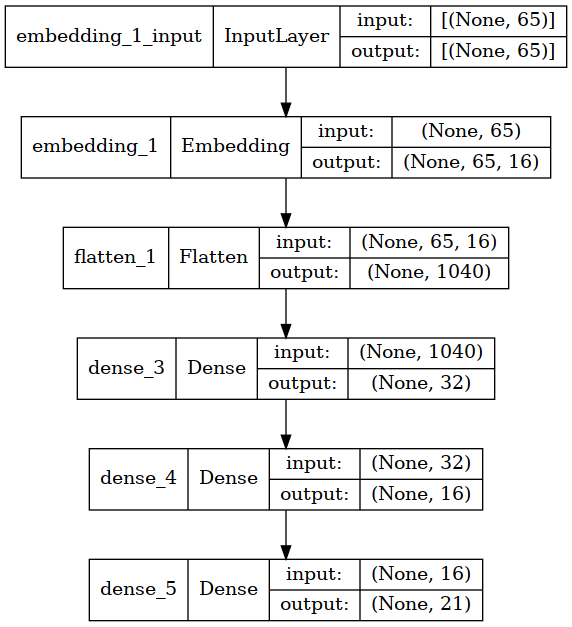

In [4]:
# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(node_to_id), 16, input_length=max_edge_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True)


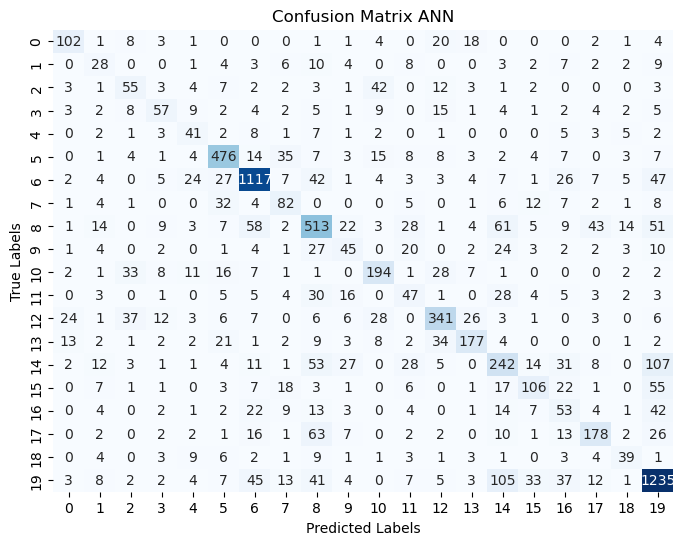

In [11]:
# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix ANN')
plt.show()

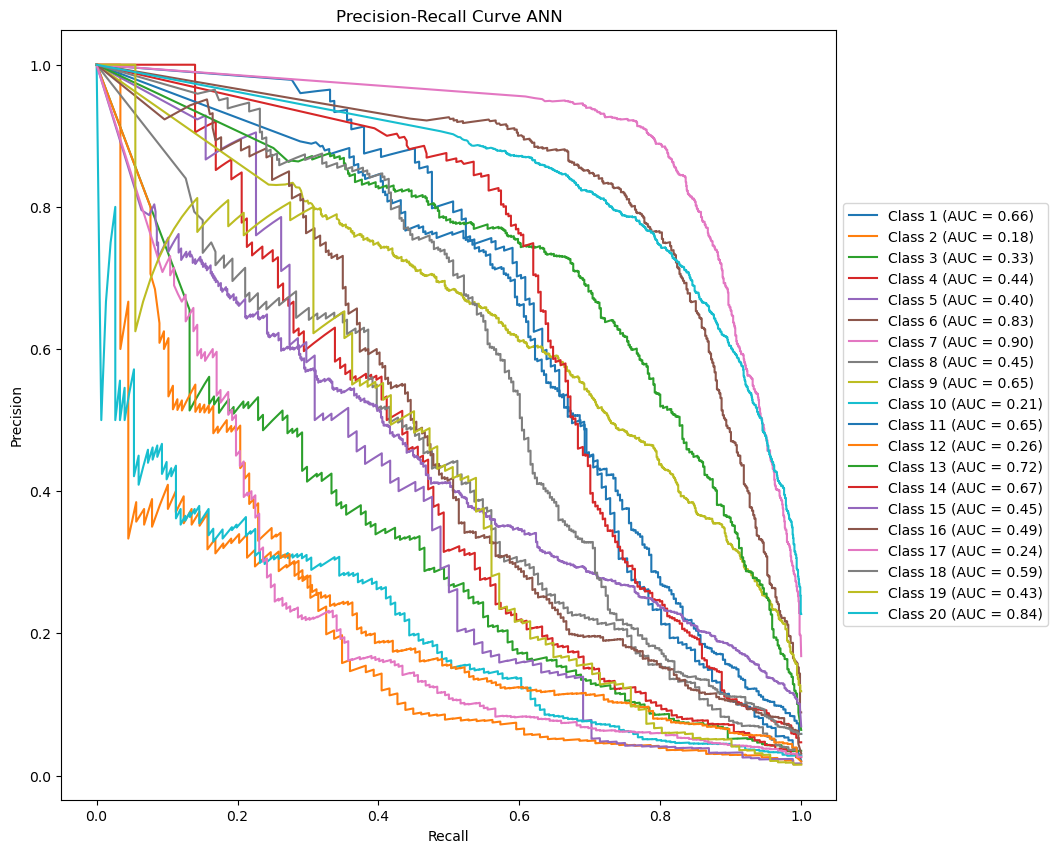

In [12]:
n_classes = y_test.shape[1]

# Define the figure size
plt.figure(figsize=(10, 10))

# For each class
for i in range(1, n_classes):
    # Compute precision-recall curve for class i
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
    # Compute area under the curve
    prc_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'Class {i} (AUC = {prc_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve ANN')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend outside of the plot
plt.show()


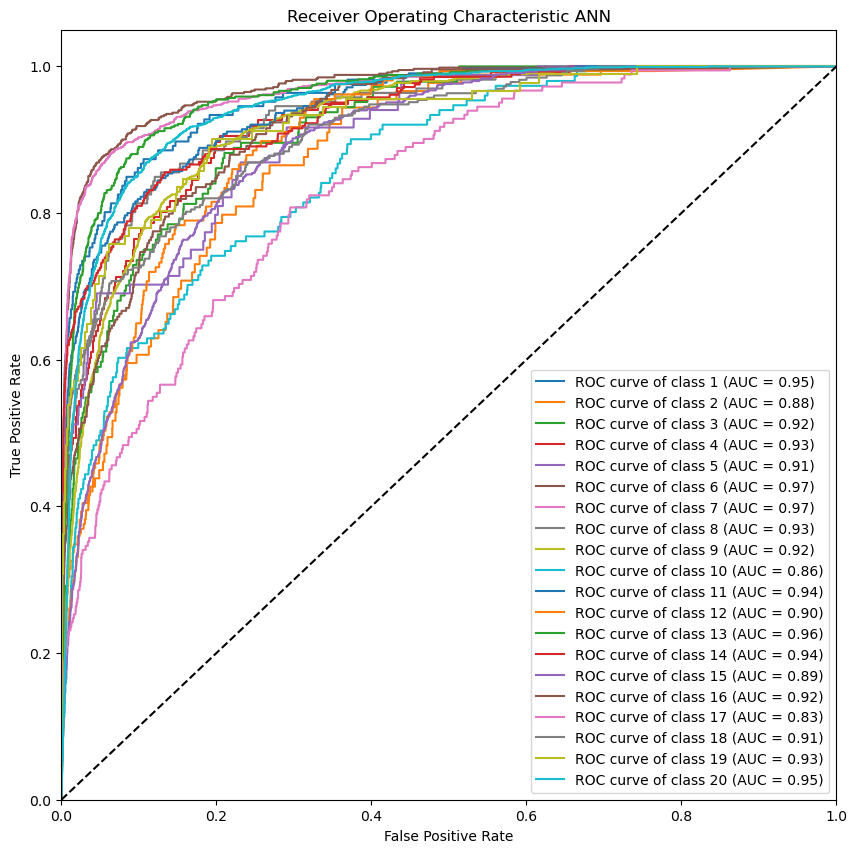

In [13]:
# Compute ROC curve and ROC area for each class
n_classes = y_test.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC AUC for each class
for i in range(1, n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 10))  # Make the plot larger
for i in range(1, n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic ANN')
plt.legend(loc="lower right")
plt.show()


## CNN  <a class="anchor" id="section_4_2"></a>

### CNN: first model <a class="anchor" id="section_4_2_1"></a>

In [50]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
# Define  hyperedges and labels
Hyperedges = edges_cuisine
HyperEdgesLabels = labels_cuisine

# Create a dictionary to map each node to a unique ID
node_to_id = {}
counter = 0
for edge in Hyperedges:
    for node in edge:
        if node not in node_to_id:
            node_to_id[node] = counter
            counter += 1

# Convert hyperedges and labels to numeric form using the node_to_id mapping
numeric_hyperedges = []
numeric_labels = []
for edge, label in zip(Hyperedges, HyperEdgesLabels):
    numeric_edge = [node_to_id[node] for node in edge]
    numeric_hyperedges.append(numeric_edge)
    numeric_labels.append(label)

# Pad the hyperedges to a fixed length 
max_edge_length = max(len(edge) for edge in numeric_hyperedges)
padded_hyperedges = tf.keras.preprocessing.sequence.pad_sequences(numeric_hyperedges, padding='post', maxlen=max_edge_length)

# Create one-hot encoded labels
num_classes = max(numeric_labels) + 1
one_hot_labels = tf.keras.utils.to_categorical(numeric_labels, num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_hyperedges, one_hot_labels, test_size=0.2, random_state=42)

# Define and train the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(node_to_id), 16, input_length=max_edge_length),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),  # Convolutional layer (Conv1D)
    tf.keras.layers.GlobalMaxPooling1D(),  # Add a GlobalMaxPooling1D layer here to reduce feature dimensions
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100)

# Calculate the train loss and accuracy
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Get the model predictions
y_pred = model.predict(x_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Get precision, recall from classification report
report = classification_report(y_true, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']

# Print the results
print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('Precision:', precision)
print('Recall:', recall)


Epoch 1/100
995/995 [==============================] - 3s 2ms/step - loss: 1.9072 - accuracy: 0.4314
Epoch 2/100
995/995 [==============================] - 2s 2ms/step - loss: 1.2804 - accuracy: 0.6156
Epoch 3/100
995/995 [==============================] - 2s 2ms/step - loss: 1.0672 - accuracy: 0.6787
Epoch 4/100
995/995 [==============================] - 2s 2ms/step - loss: 0.9263 - accuracy: 0.7186
Epoch 5/100
995/995 [==============================] - 2s 2ms/step - loss: 0.8193 - accuracy: 0.7553
Epoch 6/100
995/995 [==============================] - 2s 2ms/step - loss: 0.7375 - accuracy: 0.7803
Epoch 7/100
995/995 [==============================] - 2s 2ms/step - loss: 0.6749 - accuracy: 0.7994
Epoch 8/100
995/995 [==============================] - 2s 2ms/step - loss: 0.6191 - accuracy: 0.8172
Epoch 9/100
995/995 [==============================] - 2s 2ms/step - loss: 0.5717 - accuracy: 0.8318
Epoch 10/100
995/995 [==============================] - 2s 2ms/step - loss: 0.5288 - accura

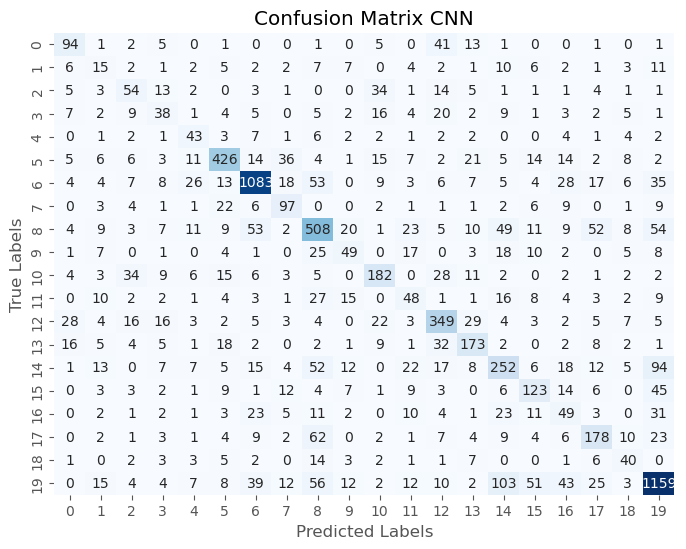

In [51]:
# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix CNN')
plt.show()


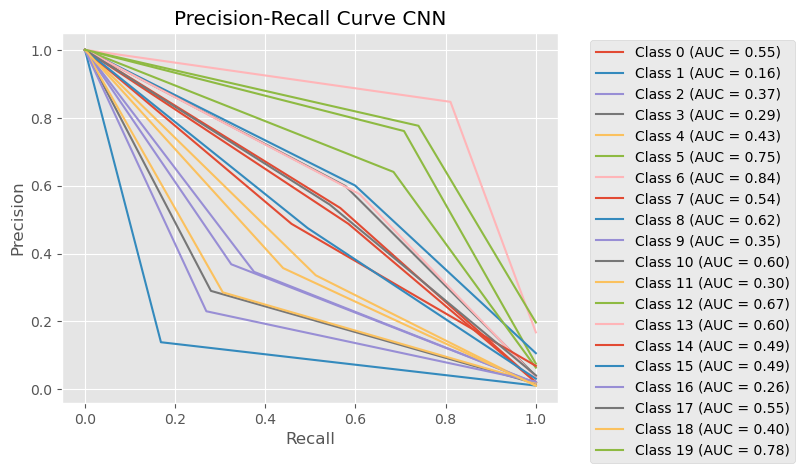

In [52]:
# Convert y_true and y_pred to binary format for multi-label tasks
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_pred))

# For each class
for i in range(num_classes-1):
    # Compute precision-recall curve for class i
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_bin[:, i])
    # Compute area under the curve
    prc_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'Class {i} (AUC = {prc_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve CNN')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside of the plot
plt.show()


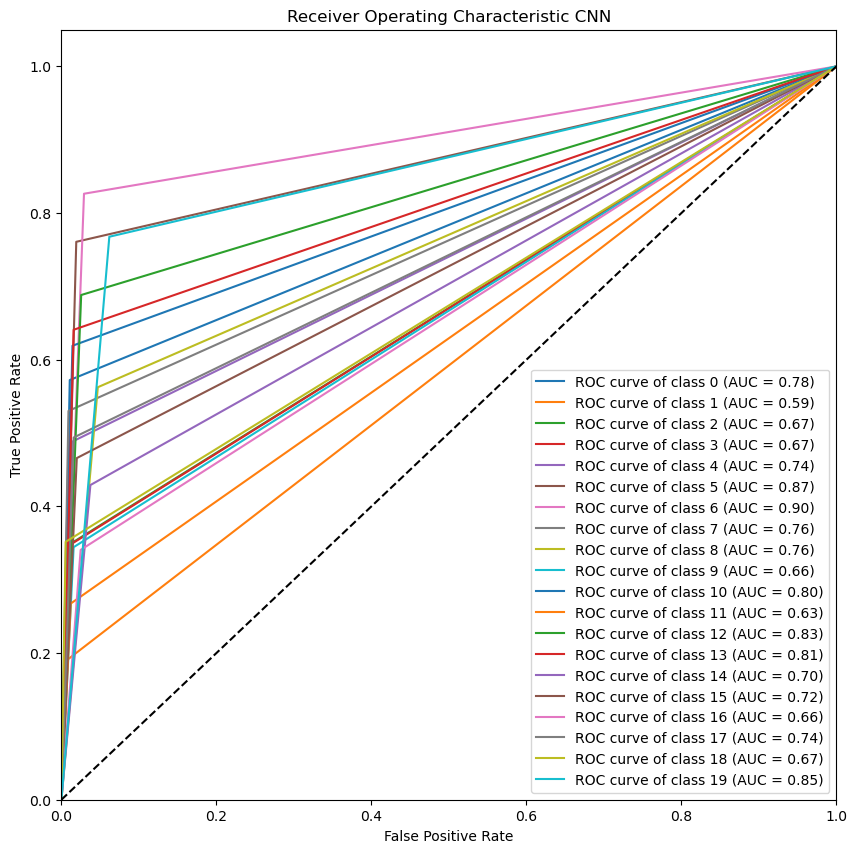

In [17]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC AUC for each class
for i in range(num_classes-1):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 10))  # Make the plot larger
for i in range(num_classes-1):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic CNN')
plt.legend(loc="lower right")
plt.show()


### CNN: parameters' tuning <a class="anchor" id="section_4_2_2"></a>

In [55]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Define  hyperedges and labels
Hyperedges = edges_cuisine
HyperEdgesLabels = labels_cuisine

# Create a dictionary to map each node to a unique ID
node_to_id = {}
counter = 0
for edge in Hyperedges:
    for node in edge:
        if node not in node_to_id:
            node_to_id[node] = counter
            counter += 1

# Convert hyperedges and labels to numeric form using the node_to_id mapping
numeric_hyperedges = []
numeric_labels = []
for edge, label in zip(Hyperedges, HyperEdgesLabels):
    numeric_edge = [node_to_id[node] for node in edge]
    numeric_hyperedges.append(numeric_edge)
    numeric_labels.append(label)

# Pad the hyperedges to a fixed length 
max_edge_length = max(len(edge) for edge in numeric_hyperedges)
padded_hyperedges = tf.keras.preprocessing.sequence.pad_sequences(numeric_hyperedges, padding='post', maxlen=max_edge_length)

# Create one-hot encoded labels
num_classes = max(numeric_labels) + 1
one_hot_labels = tf.keras.utils.to_categorical(numeric_labels, num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_hyperedges, one_hot_labels, test_size=0.2, random_state=42)

# Define the neural network model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(len(node_to_id), 16, input_length=max_edge_length),
        tf.keras.layers.Conv1D(32, 3, activation='relu'),  # Convolutional layer (Conv1D)
        tf.keras.layers.GlobalMaxPooling1D(),  # Add a GlobalMaxPooling1D layer here to reduce feature dimensions
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Perform parameter tuning using GridSearchCV
param_grid = {'epochs': [50, 100], 'batch_size': [16,32, 64]}
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(x_train, y_train)



/tmp/ipykernel_188/2523230684.py:52: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Epoch 1/50
1591/1591 [==============================] - 3s 2ms/step - loss: 1.8256 - accuracy: 0.4709
Epoch 2/50
1591/1591 [==============================] - 3s 2ms/step - loss: 1.1174 - accuracy: 0.6692
Epoch 3/50
1591/1591 [==============================] - 3s 2ms/step - loss: 0.8942 - accuracy: 0.7333
Epoch 4/50
1591/1591 [==============================] - 3s 2ms/step - loss: 0.7689 - accuracy: 0.7721
Epoch 5/50
1591/1591 [==============================] - 3s 2ms/step - loss: 0.6848 - accuracy: 0.7963
Epoch 6/50
1591/1591 [==============================] - 3s 2ms/step - loss: 0.6139 - accuracy: 0.8190
Epoch 7/50
1591/1591 [==============================] - 3s 2ms/step - loss: 0.5538 - accuracy: 0.8365
Epoch 8/50
1591/1591 [==============================] - 3s 2ms/step - loss: 0.5027 - accuracy: 0.8504
Epoch 9/50
1591/1591 [==============================] - 3s 2ms/step - loss: 0.4572 - accuracy: 0.8660
Epoch 10/50
1591/1591 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1591/1591 [==============================] - 3s 2ms/step - loss: 0.0802 - accuracy: 0.9784
Epoch 34/100
1591/1591 [==============================] - 3s 2ms/step - loss: 0.0776 - accuracy: 0.9788
Epoch 35/100
1591/1591 [==============================] - 3s 2ms/step - loss: 0.0733 - accuracy: 0.9793
Epoch 36/100
1591/1591 [==============================] - 3s 2ms/step - loss: 0.0691 - accuracy: 0.9809
Epoch 37/100
1591/1591 [==============================] - 3s 2ms/step - loss: 0.0608 - accuracy: 0.9838
Epoch 38/100
1591/1591 [==============================] - 3s 2ms/step - loss: 0.0615 - accuracy: 0.9821
Epoch 39/100
1591/1591 [==============================] - 3s 2ms/step - loss: 0.0577 - accuracy: 0.9837
Epoch 40/100
1591/1591 [==============================] - 3s 2ms/step - loss: 0.0538 - accuracy: 0.9848
Epoch 41/100
1591/1591 [==============================] - 3s 2ms/step - loss: 0.0515 - accuracy: 0.9853
Epoch 42/100
1591/1591 [==============================] - 3s 2ms/step - loss:

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



796/796 [==============================] - 2s 2ms/step - loss: 0.0274 - accuracy: 0.9930
Epoch 53/100
796/796 [==============================] - 2s 2ms/step - loss: 0.0231 - accuracy: 0.9947
Epoch 54/100
796/796 [==============================] - 2s 2ms/step - loss: 0.0211 - accuracy: 0.9948
Epoch 55/100
796/796 [==============================] - 2s 2ms/step - loss: 0.0192 - accuracy: 0.9951
Epoch 56/100
796/796 [==============================] - 2s 2ms/step - loss: 0.0189 - accuracy: 0.9957
Epoch 57/100
796/796 [==============================] - 2s 2ms/step - loss: 0.0193 - accuracy: 0.9947
Epoch 58/100
796/796 [==============================] - 2s 2ms/step - loss: 0.0200 - accuracy: 0.9951
Epoch 59/100
796/796 [==============================] - 2s 2ms/step - loss: 0.0171 - accuracy: 0.9959
Epoch 60/100
796/796 [==============================] - 2s 2ms/step - loss: 0.0171 - accuracy: 0.9955
Epoch 61/100
796/796 [==============================] - 2s 2ms/step - loss: 0.0186 - accuracy: 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



398/398 [==============================] - 1s 3ms/step - loss: 0.0121 - accuracy: 0.9976
Epoch 84/100
398/398 [==============================] - 1s 3ms/step - loss: 0.0157 - accuracy: 0.9966
Epoch 85/100
398/398 [==============================] - 1s 3ms/step - loss: 0.0246 - accuracy: 0.9927
Epoch 86/100
398/398 [==============================] - 1s 3ms/step - loss: 0.0242 - accuracy: 0.9927
Epoch 87/100
398/398 [==============================] - 1s 3ms/step - loss: 0.0136 - accuracy: 0.9970
Epoch 88/100
398/398 [==============================] - 1s 3ms/step - loss: 0.0092 - accuracy: 0.9986
Epoch 89/100
398/398 [==============================] - 1s 3ms/step - loss: 0.0067 - accuracy: 0.9992
Epoch 90/100
398/398 [==============================] - 1s 3ms/step - loss: 0.0058 - accuracy: 0.9992
Epoch 91/100
398/398 [==============================] - 1s 3ms/step - loss: 0.0058 - accuracy: 0.9993
Epoch 92/100
398/398 [==============================] - 1s 3ms/step - loss: 0.0055 - accuracy: 

In [56]:
# Print the best parameters and the corresponding scores
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

Best: 0.636758 using {'batch_size': 64, 'epochs': 50}
0.633772 (0.008522) with: {'batch_size': 16, 'epochs': 50}
0.623370 (0.009240) with: {'batch_size': 16, 'epochs': 100}
0.635721 (0.007954) with: {'batch_size': 32, 'epochs': 50}
0.620667 (0.007365) with: {'batch_size': 32, 'epochs': 100}
0.636758 (0.005403) with: {'batch_size': 64, 'epochs': 50}
0.624344 (0.006886) with: {'batch_size': 64, 'epochs': 100}


### CNN: second model <a class="anchor" id="section_4_2_3"></a>

In [57]:
#without extra layer
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
# Define hyperedges and labels
Hyperedges = edges_cuisine
HyperEdgesLabels = labels_cuisine

# Create a dictionary to map each node to a unique ID
node_to_id = {}
counter = 0
for edge in Hyperedges:
    for node in edge:
        if node not in node_to_id:
            node_to_id[node] = counter
            counter += 1

# Convert hyperedges and labels to numeric form using the node_to_id mapping
numeric_hyperedges = []
numeric_labels = []
for edge, label in zip(Hyperedges, HyperEdgesLabels):
    numeric_edge = [node_to_id[node] for node in edge]
    numeric_hyperedges.append(numeric_edge)
    numeric_labels.append(label)

# Pad the hyperedges to a fixed length 
max_edge_length = max(len(edge) for edge in numeric_hyperedges)
padded_hyperedges = tf.keras.preprocessing.sequence.pad_sequences(numeric_hyperedges, padding='post', maxlen=max_edge_length)

# Create one-hot encoded labels
num_classes = max(numeric_labels) + 1
one_hot_labels = tf.keras.utils.to_categorical(numeric_labels, num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_hyperedges, one_hot_labels, test_size=0.2, random_state=42)

# Define and train the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(node_to_id), 16, input_length=max_edge_length),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),  # Convolutional layer (Conv1D)
    tf.keras.layers.GlobalMaxPooling1D(),  # Add a GlobalMaxPooling1D layer here to reduce feature dimensions
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=16)

# Calculate the train loss and accuracy
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Get the model predictions
y_pred = model.predict(x_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Get precision, recall from classification report
report = classification_report(y_true, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']

# Print the results
print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('Precision:', precision)
print('Recall:', recall)


Epoch 1/50
1989/1989 [==============================] - 4s 2ms/step - loss: 1.7521 - accuracy: 0.4751
Epoch 2/50
1989/1989 [==============================] - 4s 2ms/step - loss: 1.2115 - accuracy: 0.6369
Epoch 3/50
1989/1989 [==============================] - 4s 2ms/step - loss: 0.9957 - accuracy: 0.7019
Epoch 4/50
1989/1989 [==============================] - 4s 2ms/step - loss: 0.8459 - accuracy: 0.7456
Epoch 5/50
1989/1989 [==============================] - 4s 2ms/step - loss: 0.7395 - accuracy: 0.7797
Epoch 6/50
1989/1989 [==============================] - 4s 2ms/step - loss: 0.6579 - accuracy: 0.8031
Epoch 7/50
1989/1989 [==============================] - 4s 2ms/step - loss: 0.5939 - accuracy: 0.8226
Epoch 8/50
1989/1989 [==============================] - 4s 2ms/step - loss: 0.5398 - accuracy: 0.8388
Epoch 9/50
1989/1989 [==============================] - 4s 2ms/step - loss: 0.4941 - accuracy: 0.8531
Epoch 10/50
1989/1989 [==============================] - 4s 2ms/step - loss: 0.454

In [58]:
#with extra layer
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
# Define  hyperedges and labels
Hyperedges = edges_cuisine
HyperEdgesLabels = labels_cuisine

# Create a dictionary to map each node to a unique ID
node_to_id = {}
counter = 0
for edge in Hyperedges:
    for node in edge:
        if node not in node_to_id:
            node_to_id[node] = counter
            counter += 1

# Convert hyperedges and labels to numeric form using the node_to_id mapping
numeric_hyperedges = []
numeric_labels = []
for edge, label in zip(Hyperedges, HyperEdgesLabels):
    numeric_edge = [node_to_id[node] for node in edge]
    numeric_hyperedges.append(numeric_edge)
    numeric_labels.append(label)

# Pad the hyperedges to a fixed length 
max_edge_length = max(len(edge) for edge in numeric_hyperedges)
padded_hyperedges = tf.keras.preprocessing.sequence.pad_sequences(numeric_hyperedges, padding='post', maxlen=max_edge_length)

# Create one-hot encoded labels
num_classes = max(numeric_labels) + 1
one_hot_labels = tf.keras.utils.to_categorical(numeric_labels, num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_hyperedges, one_hot_labels, test_size=0.2, random_state=42)


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(node_to_id), 64, input_length=max_edge_length),
    tf.keras.layers.Conv1D(64, 5, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(128, 3, activation='relu', padding='same'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=16)


# Calculate the train loss and accuracy
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Get the model predictions
y_pred = model.predict(x_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Get precision, recall from classification report
report = classification_report(y_true, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']

# Print the results
print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('Precision:', precision)
print('Recall:', recall)


Epoch 1/50
1989/1989 [==============================] - 11s 5ms/step - loss: 1.6474 - accuracy: 0.5132
Epoch 2/50
1989/1989 [==============================] - 10s 5ms/step - loss: 1.1208 - accuracy: 0.6646
Epoch 3/50
1989/1989 [==============================] - 10s 5ms/step - loss: 0.9504 - accuracy: 0.7126
Epoch 4/50
1989/1989 [==============================] - 10s 5ms/step - loss: 0.8209 - accuracy: 0.7536
Epoch 5/50
1989/1989 [==============================] - 10s 5ms/step - loss: 0.7147 - accuracy: 0.7825
Epoch 6/50
1989/1989 [==============================] - 10s 5ms/step - loss: 0.6124 - accuracy: 0.8097
Epoch 7/50
1989/1989 [==============================] - 10s 5ms/step - loss: 0.5291 - accuracy: 0.8358
Epoch 8/50
1989/1989 [==============================] - 10s 5ms/step - loss: 0.4475 - accuracy: 0.8613
Epoch 9/50
1989/1989 [==============================] - 10s 5ms/step - loss: 0.3946 - accuracy: 0.8768
Epoch 10/50
1989/1989 [==============================] - 10s 5ms/step - l

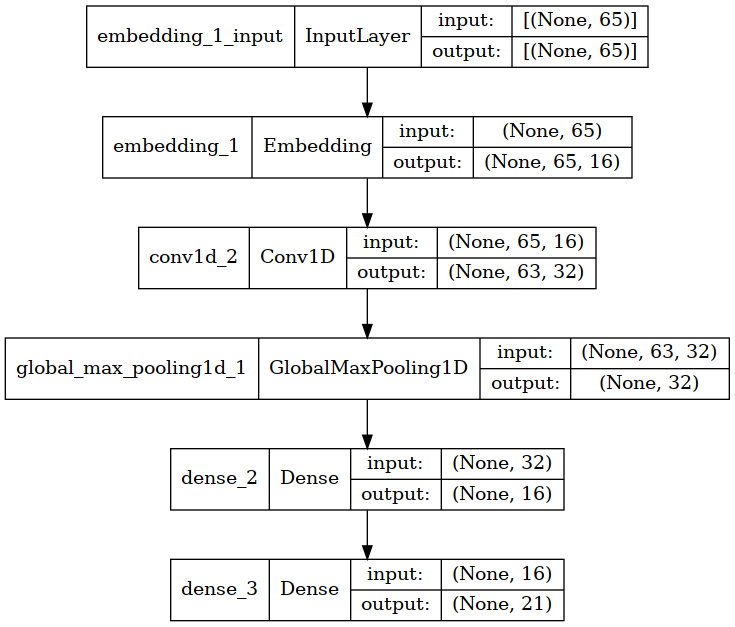

In [4]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(node_to_id), 16, input_length=max_edge_length),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True)


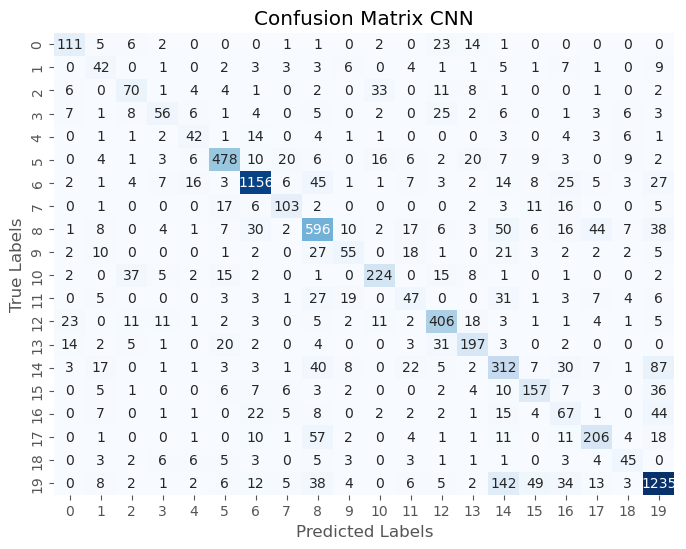

In [59]:
# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix CNN')
plt.show()


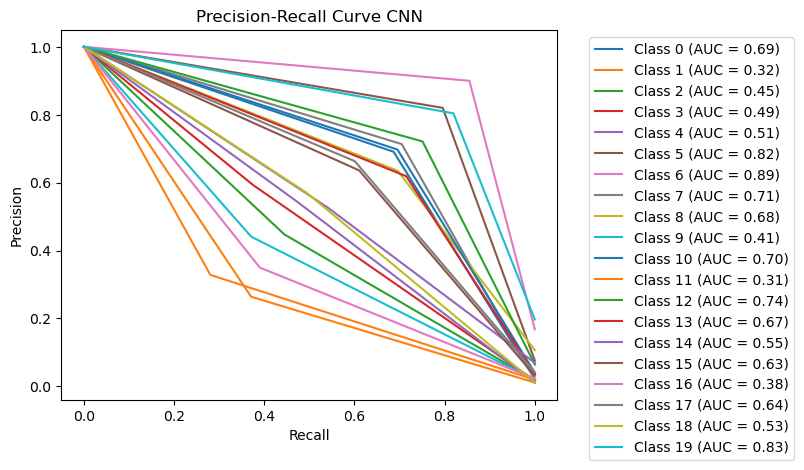

In [31]:
# Convert y_true and y_pred to binary format for multi-label tasks
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_pred))

# For each class
for i in range(num_classes-1):
    # Compute precision-recall curve for class i
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_bin[:, i])
    # Compute area under the curve
    prc_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'Class {i} (AUC = {prc_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve CNN')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside of the plot
plt.show()


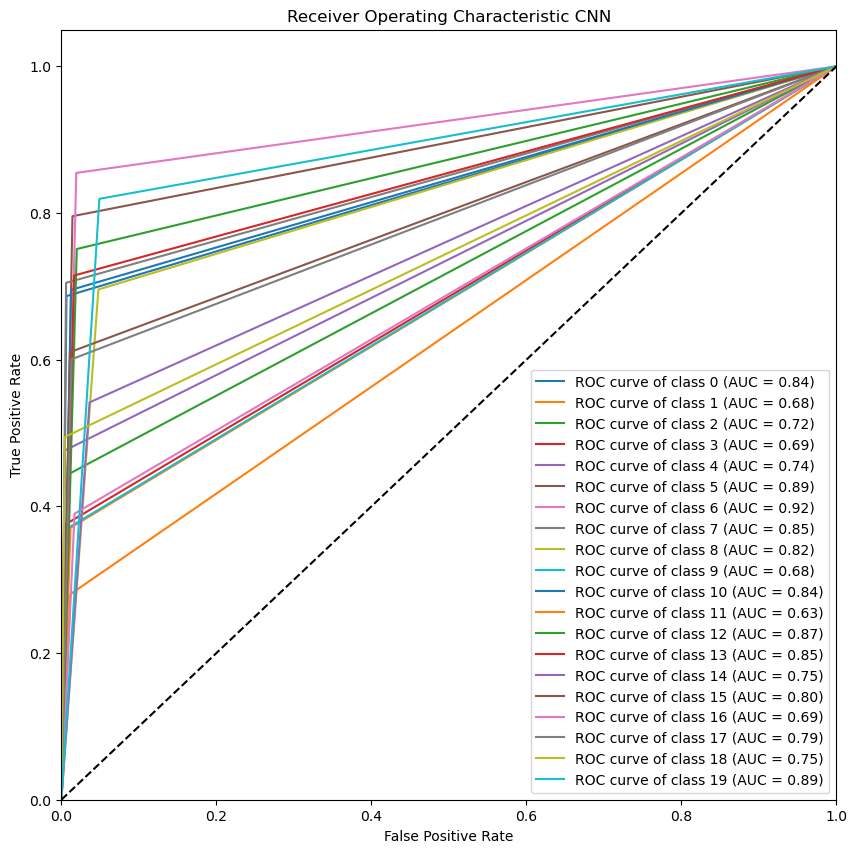

In [32]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC AUC for each class
for i in range(num_classes-1):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 10))  # Make the plot larger
for i in range(num_classes-1):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic CNN')
plt.legend(loc="lower right")
plt.show()


## RNN model for classification <a class="anchor" id="section_4_3"></a>

### RNN: First model <a class="anchor" id="section_4_3_1"></a>

In [28]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
# Define  hyperedges and labels
Hyperedges = edges_cuisine
HyperEdgesLabels = labels_cuisine

# Create a dictionary to map each node to a unique ID
node_to_id = {}
counter = 0
for edge in Hyperedges:
    for node in edge:
        if node not in node_to_id:
            node_to_id[node] = counter
            counter += 1

# Convert hyperedges and labels to numeric form using the node_to_id mapping
numeric_hyperedges = []
numeric_labels = []
for edge, label in zip(Hyperedges, HyperEdgesLabels):
    numeric_edge = [node_to_id[node] for node in edge]
    numeric_hyperedges.append(numeric_edge)
    numeric_labels.append(label)

# Pad the hyperedges to a fixed length 
max_edge_length = max(len(edge) for edge in numeric_hyperedges)
padded_hyperedges = tf.keras.preprocessing.sequence.pad_sequences(numeric_hyperedges, padding='post', maxlen=max_edge_length)

# Create one-hot encoded labels
num_classes = max(numeric_labels) + 1
one_hot_labels = tf.keras.utils.to_categorical(numeric_labels, num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_hyperedges, one_hot_labels, test_size=0.2, random_state=42)

# Define and train the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(node_to_id), 16, input_length=max_edge_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32, return_sequences=True)),  # Bidirectional GRU layer
    tf.keras.layers.GRU(16),  # Additional GRU layer
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 100
for epoch in range(num_epochs):
    history = model.fit(x_train, y_train, epochs=1, verbose=1)
    train_loss = history.history['loss'][0]
    train_accuracy = history.history['accuracy'][0]
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.6f}, Train Accuracy: {train_accuracy * 100:.2f}%, Test Loss: {test_loss:.6f}, Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict the classes
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Calculate metrics
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')

# Print the results
print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('Precision:', precision)
print('Recall:', recall)


995/995 [==============================] - 57s 53ms/step - loss: 2.6363 - accuracy: 0.1927
Epoch 1/100, Train Loss: 2.636340, Train Accuracy: 19.27%, Test Loss: 2.598857, Test Accuracy: 19.70%
995/995 [==============================] - 53s 53ms/step - loss: 2.6140 - accuracy: 0.1963
Epoch 2/100, Train Loss: 2.613950, Train Accuracy: 19.63%, Test Loss: 2.597960, Test Accuracy: 19.70%
995/995 [==============================] - 53s 53ms/step - loss: 2.3816 - accuracy: 0.2814
Epoch 3/100, Train Loss: 2.381571, Train Accuracy: 28.14%, Test Loss: 1.991490, Test Accuracy: 38.27%
995/995 [==============================] - 53s 53ms/step - loss: 1.7717 - accuracy: 0.4594
Epoch 4/100, Train Loss: 1.771691, Train Accuracy: 45.94%, Test Loss: 1.492930, Test Accuracy: 54.73%
995/995 [==============================] - 53s 54ms/step - loss: 1.3483 - accuracy: 0.5869
Epoch 5/100, Train Loss: 1.348345, Train Accuracy: 58.69%, Test Loss: 1.350354, Test Accuracy: 58.52%
995/995 [==========================

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



995/995 [==============================] - 51s 51ms/step - loss: 0.6161 - accuracy: 0.8236
Epoch 15/100, Train Loss: 0.616116, Train Accuracy: 82.36%, Test Loss: 1.229245, Test Accuracy: 68.08%
995/995 [==============================] - 52s 52ms/step - loss: 0.5885 - accuracy: 0.8302
Epoch 16/100, Train Loss: 0.588513, Train Accuracy: 83.02%, Test Loss: 1.256608, Test Accuracy: 68.17%
995/995 [==============================] - 51s 51ms/step - loss: 0.5627 - accuracy: 0.8410
Epoch 17/100, Train Loss: 0.562702, Train Accuracy: 84.10%, Test Loss: 1.290938, Test Accuracy: 67.99%
822/995 [=======================>......] - ETA: 8s - loss: 0.5409 - accuracy: 0.8477

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



995/995 [==============================] - 48s 48ms/step - loss: 0.4445 - accuracy: 0.8776
Epoch 23/100, Train Loss: 0.444496, Train Accuracy: 87.76%, Test Loss: 1.468668, Test Accuracy: 66.69%
995/995 [==============================] - 48s 49ms/step - loss: 0.4285 - accuracy: 0.8823
Epoch 24/100, Train Loss: 0.428531, Train Accuracy: 88.23%, Test Loss: 1.494258, Test Accuracy: 67.05%
995/995 [==============================] - 48s 48ms/step - loss: 0.4124 - accuracy: 0.8877
Epoch 25/100, Train Loss: 0.412366, Train Accuracy: 88.77%, Test Loss: 1.535472, Test Accuracy: 66.62%
995/995 [==============================] - 49s 50ms/step - loss: 0.3964 - accuracy: 0.8916
Epoch 26/100, Train Loss: 0.396442, Train Accuracy: 89.16%, Test Loss: 1.550715, Test Accuracy: 66.84%
703/995 [====================>.........] - ETA: 15s - loss: 0.3822 - accuracy: 0.8962

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



995/995 [==============================] - 53s 53ms/step - loss: 0.3705 - accuracy: 0.8989
Epoch 28/100, Train Loss: 0.370473, Train Accuracy: 89.89%, Test Loss: 1.614428, Test Accuracy: 66.17%
995/995 [==============================] - 51s 51ms/step - loss: 0.3599 - accuracy: 0.9020
Epoch 29/100, Train Loss: 0.359912, Train Accuracy: 90.20%, Test Loss: 1.618330, Test Accuracy: 66.54%
995/995 [==============================] - 49s 49ms/step - loss: 0.3471 - accuracy: 0.9052
Epoch 30/100, Train Loss: 0.347126, Train Accuracy: 90.52%, Test Loss: 1.658464, Test Accuracy: 66.42%
995/995 [==============================] - 47s 47ms/step - loss: 0.3330 - accuracy: 0.9099
Epoch 31/100, Train Loss: 0.333034, Train Accuracy: 90.99%, Test Loss: 1.684375, Test Accuracy: 66.61%
995/995 [==============================] - 51s 51ms/step - loss: 0.3229 - accuracy: 0.9119
Epoch 32/100, Train Loss: 0.322922, Train Accuracy: 91.19%, Test Loss: 1.733712, Test Accuracy: 66.13%
995/995 [=====================

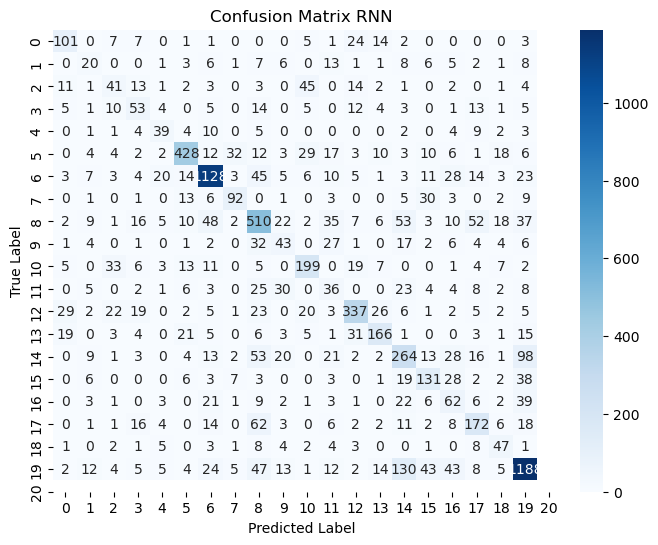

In [29]:
# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Get the class labels
class_labels = np.arange(num_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix RNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### RNN: parameters tuning <a class="anchor" id="section_4_3_2"></a>

In [3]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
# Define hyperedges and labels
Hyperedges = edges_cuisine
HyperEdgesLabels = labels_cuisine

# Create a dictionary to map each node to a unique ID
node_to_id = {}
counter = 0
for edge in Hyperedges:
    for node in edge:
        if node not in node_to_id:
            node_to_id[node] = counter
            counter += 1

# Convert hyperedges and labels to numeric form using the node_to_id mapping
numeric_hyperedges = []
numeric_labels = []
for edge, label in zip(Hyperedges, HyperEdgesLabels):
    numeric_edge = [node_to_id[node] for node in edge]
    numeric_hyperedges.append(numeric_edge)
    numeric_labels.append(label)

# Pad the hyperedges to a fixed length 
max_edge_length = max(len(edge) for edge in numeric_hyperedges)
padded_hyperedges = tf.keras.preprocessing.sequence.pad_sequences(numeric_hyperedges, padding='post', maxlen=max_edge_length)

# Create one-hot encoded labels
num_classes = max(numeric_labels) + 1
one_hot_labels = tf.keras.utils.to_categorical(numeric_labels, num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_hyperedges, one_hot_labels, test_size=0.2, random_state=42)

# Define the function to create the model
def create_model(units=16, dropout_rate=0.2, optimizer='adam'):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(len(node_to_id), units, input_length=max_edge_length),
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units, return_sequences=True)),
        tf.keras.layers.GRU(units),
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the Keras classifier for GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'units': [16, 32],
    'dropout_rate': [0.2, 0.3, 0.4],
}

# Perform grid search cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')

# Print the results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.6f}")


2023-07-12 09:38:38.256367: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/anaconda/envs/Python3/lib:
2023-07-12 09:38:38.256400: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/tmp/ipykernel_134/630245019.py:56: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)
2023-07-12 09:38:40.434723: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/anaconda/envs/Python3/lib:
2023-07-12 09:38:40.434762: W tensorflow/stream_executor/

Best Parameters:  {'dropout_rate': 0.2, 'units': 16}
Best Accuracy:  0.1970836023489634
Test Accuracy: 19.70%
F1 Score: 0.064834


### RNN: second model <a class="anchor" id="section_4_3_3"></a>

In [60]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
# Define hyperedges and labels
Hyperedges = edges_cuisine
HyperEdgesLabels = labels_cuisine

# Create a dictionary to map each node to a unique ID
node_to_id = {}
counter = 0
for edge in Hyperedges:
    for node in edge:
        if node not in node_to_id:
            node_to_id[node] = counter
            counter += 1

# Convert hyperedges and labels to numeric form using the node_to_id mapping
numeric_hyperedges = []
numeric_labels = []
for edge, label in zip(Hyperedges, HyperEdgesLabels):
    numeric_edge = [node_to_id[node] for node in edge]
    numeric_hyperedges.append(numeric_edge)
    numeric_labels.append(label)

# Pad the hyperedges to a fixed length 
max_edge_length = max(len(edge) for edge in numeric_hyperedges)
padded_hyperedges = tf.keras.preprocessing.sequence.pad_sequences(numeric_hyperedges, padding='post', maxlen=max_edge_length)

# Create one-hot encoded labels
num_classes = max(numeric_labels) + 1
one_hot_labels = tf.keras.utils.to_categorical(numeric_labels, num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_hyperedges, one_hot_labels, test_size=0.2, random_state=42)

# Define and train the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(node_to_id), 16, input_length=max_edge_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32, return_sequences=True)),
    tf.keras.layers.GRU(16),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 100
for epoch in range(num_epochs):
    history = model.fit(x_train, y_train, epochs=1, verbose=1)
    train_loss = history.history['loss'][0]
    train_accuracy = history.history['accuracy'][0]
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.6f}, Train Accuracy: {train_accuracy * 100:.2f}%, Test Loss: {test_loss:.6f}, Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict the classes
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Calculate metrics
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')

# Print the results
print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('Precision:', precision)
print('Recall:', recall)


995/995 [==============================] - 65s 61ms/step - loss: 2.3063 - accuracy: 0.3211
Epoch 1/100, Train Loss: 2.306294, Train Accuracy: 32.11%, Test Loss: 1.726639, Test Accuracy: 47.20%
995/995 [==============================] - 61s 62ms/step - loss: 1.5476 - accuracy: 0.5317
Epoch 2/100, Train Loss: 1.547571, Train Accuracy: 53.17%, Test Loss: 1.414914, Test Accuracy: 56.84%
995/995 [==============================] - 61s 61ms/step - loss: 1.2845 - accuracy: 0.6162
Epoch 3/100, Train Loss: 1.284500, Train Accuracy: 61.62%, Test Loss: 1.266743, Test Accuracy: 61.94%
995/995 [==============================] - 60s 61ms/step - loss: 1.1165 - accuracy: 0.6636
Epoch 4/100, Train Loss: 1.116504, Train Accuracy: 66.36%, Test Loss: 1.194821, Test Accuracy: 63.73%
995/995 [==============================] - 61s 61ms/step - loss: 0.9973 - accuracy: 0.6958
Epoch 5/100, Train Loss: 0.997338, Train Accuracy: 69.58%, Test Loss: 1.160781, Test Accuracy: 65.12%
995/995 [==========================

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



995/995 [==============================] - 61s 62ms/step - loss: 0.0820 - accuracy: 0.9774
Epoch 70/100, Train Loss: 0.082023, Train Accuracy: 97.74%, Test Loss: 3.365219, Test Accuracy: 64.89%
995/995 [==============================] - 61s 62ms/step - loss: 0.0855 - accuracy: 0.9758
Epoch 71/100, Train Loss: 0.085481, Train Accuracy: 97.58%, Test Loss: 3.388490, Test Accuracy: 63.91%
995/995 [==============================] - 61s 61ms/step - loss: 0.0861 - accuracy: 0.9757
Epoch 72/100, Train Loss: 0.086099, Train Accuracy: 97.57%, Test Loss: 3.425980, Test Accuracy: 64.20%
995/995 [==============================] - 61s 62ms/step - loss: 0.0817 - accuracy: 0.9777
Epoch 73/100, Train Loss: 0.081675, Train Accuracy: 97.77%, Test Loss: 3.485982, Test Accuracy: 64.01%
995/995 [==============================] - 61s 61ms/step - loss: 0.0817 - accuracy: 0.9769
Epoch 74/100, Train Loss: 0.081747, Train Accuracy: 97.69%, Test Loss: 3.520127, Test Accuracy: 63.02%
995/995 [=====================

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



995/995 [==============================] - 61s 61ms/step - loss: 0.0716 - accuracy: 0.9794
Epoch 83/100, Train Loss: 0.071572, Train Accuracy: 97.94%, Test Loss: 3.689353, Test Accuracy: 63.95%
995/995 [==============================] - 61s 62ms/step - loss: 0.0683 - accuracy: 0.9817
Epoch 84/100, Train Loss: 0.068278, Train Accuracy: 98.17%, Test Loss: 3.714462, Test Accuracy: 64.06%
995/995 [==============================] - 61s 61ms/step - loss: 0.0587 - accuracy: 0.9841
Epoch 85/100, Train Loss: 0.058743, Train Accuracy: 98.41%, Test Loss: 3.804003, Test Accuracy: 63.13%
338/995 [=========>....................] - ETA: 40s - loss: 0.0631 - accuracy: 0.9834

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



995/995 [==============================] - 63s 63ms/step - loss: 0.0645 - accuracy: 0.9819
Epoch 86/100, Train Loss: 0.064533, Train Accuracy: 98.19%, Test Loss: 3.798901, Test Accuracy: 63.75%
995/995 [==============================] - 61s 61ms/step - loss: 0.0691 - accuracy: 0.9810
Epoch 87/100, Train Loss: 0.069078, Train Accuracy: 98.10%, Test Loss: 3.824615, Test Accuracy: 63.62%
995/995 [==============================] - 61s 61ms/step - loss: 0.0634 - accuracy: 0.9824
Epoch 88/100, Train Loss: 0.063375, Train Accuracy: 98.24%, Test Loss: 3.836455, Test Accuracy: 63.58%
995/995 [==============================] - 61s 62ms/step - loss: 0.0647 - accuracy: 0.9814
Epoch 89/100, Train Loss: 0.064698, Train Accuracy: 98.14%, Test Loss: 3.874337, Test Accuracy: 63.60%
995/995 [==============================] - 61s 62ms/step - loss: 0.0608 - accuracy: 0.9835
Epoch 90/100, Train Loss: 0.060789, Train Accuracy: 98.35%, Test Loss: 3.897853, Test Accuracy: 63.98%
995/995 [=====================

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



995/995 [==============================] - 60s 61ms/step - loss: 0.0504 - accuracy: 0.9857
Epoch 97/100, Train Loss: 0.050412, Train Accuracy: 98.57%, Test Loss: 4.089558, Test Accuracy: 63.61%
995/995 [==============================] - 63s 63ms/step - loss: 0.0602 - accuracy: 0.9835
Epoch 98/100, Train Loss: 0.060215, Train Accuracy: 98.35%, Test Loss: 4.116583, Test Accuracy: 64.05%
995/995 [==============================] - 61s 61ms/step - loss: 0.0530 - accuracy: 0.9856
Epoch 99/100, Train Loss: 0.052953, Train Accuracy: 98.56%, Test Loss: 4.117082, Test Accuracy: 63.67%
995/995 [==============================] - 61s 61ms/step - loss: 0.0527 - accuracy: 0.9854
Epoch 100/100, Train Loss: 0.052726, Train Accuracy: 98.54%, Test Loss: 4.192503, Test Accuracy: 63.49%
Train Loss: 0.05272600054740906
Train Accuracy: 0.9854175448417664
Test Loss: 4.192503452301025
Test Accuracy: 0.6349465847015381
Precision: 0.6404600776594559
Recall: 0.6349465744814582


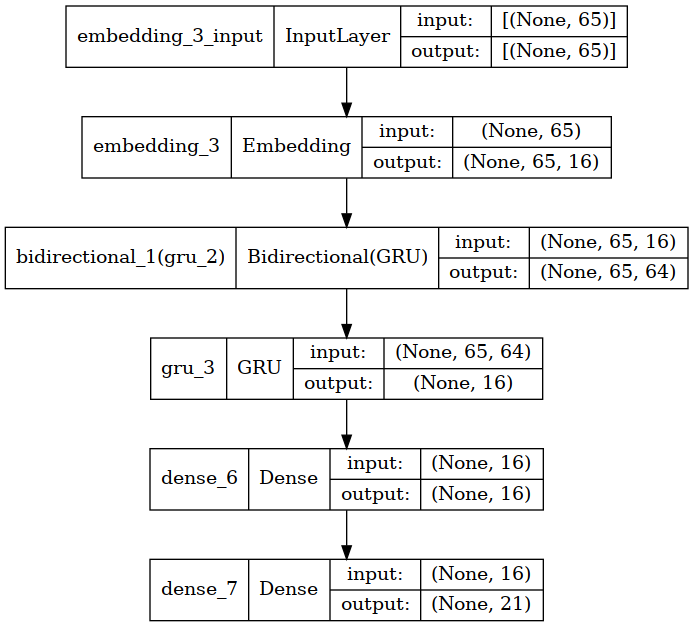

In [6]:
# the model's architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(node_to_id), 16, input_length=max_edge_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32, return_sequences=True)),
    tf.keras.layers.GRU(16),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True)


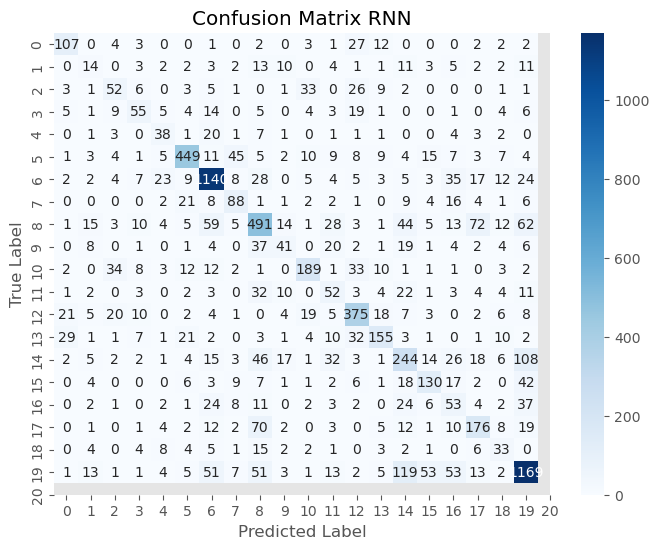

In [61]:
# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Get the class labels
class_labels = np.arange(num_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix RNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## HyperedgeClassifier model for classification <a class="anchor" id="section_4_4"></a>

Based on @article{feng2018hypergraph,
  title={Hypergraph Neural Networks},
  author={Feng, Yifan and You, Haoxuan and Zhang, Zizhao and Ji, Rongrong and Gao, Yue},
  journal={AAAI 2019},
  year={2018}
}

## HyperedgeClassifier: first model <a class="anchor" id="section_4_4_1"></a>

In [63]:
# Set a random seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

class HGNN_conv(nn.Module):
    def __init__(self, in_ft, out_ft, bias=True):
        super(HGNN_conv, self).__init__()

        self.weight = nn.Parameter(torch.Tensor(in_ft, out_ft))
        if bias:
            self.bias = nn.Parameter(torch.Tensor(out_ft))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, x: torch.Tensor):
        x = x.matmul(self.weight)
        if self.bias is not None:
            x = x + self.bias
        return x

class HyperedgeClassifier(nn.Module):
    def __init__(self, num_nodes, n_class, n_hid, dropout=0.5):
        super(HyperedgeClassifier, self).__init__()
        self.dropout = dropout
        self.hgc1 = HGNN_conv(num_nodes, n_hid)
        self.hgc2 = HGNN_conv(n_hid, n_class)

    def forward(self, x, edges):
        x = F.relu(self.hgc1(x))
        x = F.dropout(x, self.dropout, training=self.training)
        x_edge = torch.stack([torch.mean(x[edge], dim=0) for edge in edges])  # Edge feature extraction
        x_edge = self.hgc2(x_edge)
        return F.log_softmax(x_edge, dim=1)

# Data
hyperedges = edges_cuisine
hyperedge_labels = labels_cuisine
num_nodes = max([max(edge) for edge in hyperedges]) + 1
num_edges = len(hyperedges)
num_classes = max(hyperedge_labels) + 1

# Node features are one-hot encoded node indices
x = torch.eye(num_nodes)

# Convert hyperedges to PyTorch tensors
edges = [torch.tensor(edge) for edge in hyperedges]

# Duplicate hyperedge labels for each hyperedge
y = [hyperedge_labels[i % len(hyperedge_labels)] for i in range(num_edges)]
y = torch.tensor(y)

# Perform train/test split
indices = list(range(num_edges))
random.shuffle(indices)
split_ratio = 0.8  # 80% of the data for training, 20% for testing
split_index = int(split_ratio * num_edges)
train_indices = indices[:split_index]
test_indices = indices[split_index:]

# Separate training and testing data
train_x = x
train_edges = [edges[i] for i in train_indices]
train_y = y[train_indices]

test_x = x
test_edges = [edges[i] for i in test_indices]
test_y = y[test_indices]

# Model
model = HyperedgeClassifier(num_nodes, num_classes, 32)

# Loss function and optimizer
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.04)

# Model training
model.train()
for epoch in range(500):
    optimizer.zero_grad()
    output = model(train_x, train_edges)
    loss = criterion(output, train_y)
    loss.backward()
    optimizer.step()
    print('Epoch', epoch, 'Loss', loss.item())

# Model evaluation on testing data
model.eval()
with torch.no_grad():
    output = model(test_x, test_edges)
    _, predicted = torch.max(output, dim=1)
    correct = (predicted == test_y).sum().item()
    total = test_y.size(0)
    accuracy = correct / total * 100

print('Testing Accuracy:', accuracy, '%')

Epoch 0 Loss 3.096320867538452
Epoch 1 Loss 2.982835292816162
Epoch 2 Loss 2.875108003616333
Epoch 3 Loss 2.7535598278045654
Epoch 4 Loss 2.6412971019744873
Epoch 5 Loss 2.582244396209717
Epoch 6 Loss 2.575803518295288
Epoch 7 Loss 2.552133798599243
Epoch 8 Loss 2.5172817707061768
Epoch 9 Loss 2.4541380405426025
Epoch 10 Loss 2.4104437828063965
Epoch 11 Loss 2.363657236099243
Epoch 13 Loss 2.2564408779144287
Epoch 14 Loss 2.201462984085083
Epoch 15 Loss 2.1466598510742188
Epoch 16 Loss 2.077693223953247
Epoch 17 Loss 1.997773289680481
Epoch 18 Loss 1.9330105781555176
Epoch 19 Loss 1.853736162185669
Epoch 20 Loss 1.7769955396652222
Epoch 21 Loss 1.7237235307693481
Epoch 22 Loss 1.637291669845581
Epoch 23 Loss 1.5636794567108154
Epoch 24 Loss 1.5011606216430664
Epoch 25 Loss 1.4635164737701416
Epoch 26 Loss 1.4078876972198486
Epoch 27 Loss 1.3646323680877686
Epoch 28 Loss 1.3373312950134277
Epoch 29 Loss 1.2765228748321533
Epoch 30 Loss 1.2380279302597046
Epoch 31 Loss 1.2136139869689941

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Calculate train accuracy
train_output = model(train_x, train_edges)
_, train_predicted = torch.max(train_output, dim=1)
train_accuracy = accuracy_score(train_y.numpy(), train_predicted.numpy())

# Calculate test metrics
test_loss = criterion(output, test_y).item()
test_accuracy = accuracy_score(test_y.numpy(), predicted.numpy())
precision = precision_score(test_y.numpy(), predicted.numpy(), average='weighted')
recall = recall_score(test_y.numpy(), predicted.numpy(), average='weighted')

# Print the results
train_loss = loss.item()

print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('Precision:', precision)
print('Recall:', recall)


Train Loss: 0.5104035139083862
Train Accuracy: 0.905653854615167
Test Loss: 1.0623137950897217
Test Accuracy: 0.748585795097423
Precision: 0.7460784931379977
Recall: 0.748585795097423


### HyperedgeClassifier parameters' tuning <a class="anchor" id="section_4_4_2"></a>

In [5]:
# Set a random seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

class HGNN_conv(nn.Module):
    def __init__(self, in_ft, out_ft, bias=True):
        super(HGNN_conv, self).__init__()

        self.weight = nn.Parameter(torch.Tensor(in_ft, out_ft))
        if bias:
            self.bias = nn.Parameter(torch.Tensor(out_ft))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, x: torch.Tensor):
        x = x.matmul(self.weight)
        if self.bias is not None:
            x = x + self.bias
        return x

class HyperedgeClassifier(nn.Module):
    def __init__(self, num_nodes, n_class, n_hid, dropout=0.5):
        super(HyperedgeClassifier, self).__init__()
        self.dropout = dropout
        self.hgc1 = HGNN_conv(num_nodes, n_hid)
        self.hgc2 = HGNN_conv(n_hid, n_class)

    def forward(self, x, edges):
        x = F.relu(self.hgc1(x))
        x = F.dropout(x, self.dropout, training=self.training)
        x_edge = torch.stack([torch.mean(x[edge], dim=0) for edge in edges])  # Edge feature extraction
        x_edge = self.hgc2(x_edge)
        return F.log_softmax(x_edge, dim=1)

# Data
hyperedges = edges_cuisine
hyperedge_labels = labels_cuisine
num_nodes = max([max(edge) for edge in hyperedges]) + 1
num_edges = len(hyperedges)
num_classes = max(hyperedge_labels) + 1

# Node features are one-hot encoded node indices
x = torch.eye(num_nodes)

# Convert hyperedges to PyTorch tensors
edges = [torch.tensor(edge) for edge in hyperedges]

# Duplicate hyperedge labels for each hyperedge
y = [hyperedge_labels[i % len(hyperedge_labels)] for i in range(num_edges)]
y = torch.tensor(y)

# Perform train/test split
random.seed(42)  # Set a random seed for reproducibility
indices = list(range(num_edges))
random.shuffle(indices)
split_ratio = 0.8  # 80% of the data for training, 20% for testing
split_index = int(split_ratio * num_edges)
train_indices = indices[:split_index]
test_indices = indices[split_index:]

# Separate training and testing data
train_x = x
train_edges = [edges[i] for i in train_indices]
train_y = y[train_indices]

test_x = x
test_edges = [edges[i] for i in test_indices]
test_y = y[test_indices]

# Define hyperparameters for grid search
param_grid = {
    'n_hid': [16, 32, 64],
    'dropout': [0.5],
    'lr': [0.01, 0.02, 0.04]
}

# Track best hyperparameters and corresponding accuracy
best_accuracy = 0.0
best_hyperparameters = {}

# Perform grid search
total_iterations = len(list(itertools.product(*param_grid.values())))
for i, params in enumerate(itertools.product(*param_grid.values())):
    # Extract hyperparameters from the grid
    n_hid, dropout, lr = params

    # Create a new instance of the model with the current hyperparameters
    model = HyperedgeClassifier(num_nodes, num_classes, n_hid, dropout)

    # Loss function and optimizer
    criterion = nn.NLLLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Model training
    model.train()
    for epoch in range(500):
        optimizer.zero_grad()
        output = model(train_x, train_edges)
        loss = criterion(output, train_y)
        loss.backward()
        optimizer.step()

    # Model evaluation on testing data
    model.eval()
    with torch.no_grad():
        output = model(test_x, test_edges)
        _, predicted = torch.max(output, dim=1)
        correct = (predicted == test_y).sum().item()
        total = test_y.size(0)
        accuracy = correct / total * 100

    # Update best hyperparameters if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparameters = {'n_hid': n_hid, 'dropout': dropout, 'lr': lr}

    # Print progress update
    print(f"[{i+1}/{total_iterations}] Hyperparameters:", params)
    print("Accuracy:", accuracy, "%\n")

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", best_hyperparameters)
print("Best Accuracy:", best_accuracy, "%")


[1/9] Hyperparameters: (16, 0.5, 0.01)
Accuracy: 75.31112507856695 %

[2/9] Hyperparameters: (16, 0.5, 0.02)
Accuracy: 75.00942803268384 %

[3/9] Hyperparameters: (16, 0.5, 0.04)
Accuracy: 74.39346323067252 %

[4/9] Hyperparameters: (32, 0.5, 0.01)
Accuracy: 76.41734758013827 %

[5/9] Hyperparameters: (32, 0.5, 0.02)
Accuracy: 75.96480201131364 %

[6/9] Hyperparameters: (32, 0.5, 0.04)
Accuracy: 74.90886235072281 %

[7/9] Hyperparameters: (64, 0.5, 0.01)
Accuracy: 76.0779384035198 %

[9/9] Hyperparameters: (64, 0.5, 0.04)
Accuracy: 74.84600879949717 %

Best Hyperparameters: {'n_hid': 32, 'dropout': 0.5, 'lr': 0.01}
Best Accuracy: 76.41734758013827 %


### HyperedgeClassifier: second model <a class="anchor" id="section_4_4_3"></a>

In [70]:
# Set a random seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

class HGNN_conv(nn.Module):
    def __init__(self, in_ft, out_ft, bias=True):
        super(HGNN_conv, self).__init__()

        self.weight = nn.Parameter(torch.Tensor(in_ft, out_ft))
        if bias:
            self.bias = nn.Parameter(torch.Tensor(out_ft))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, x: torch.Tensor):
        x = x.matmul(self.weight)
        if self.bias is not None:
            x = x + self.bias
        return x

class HyperedgeClassifier(nn.Module):
    def __init__(self, num_nodes, n_class, n_hid, dropout=0.5):
        super(HyperedgeClassifier, self).__init__()
        self.dropout = dropout
        self.hgc1 = HGNN_conv(num_nodes, n_hid)
        self.hgc2 = HGNN_conv(n_hid, n_class)

    def forward(self, x, edges):
        x = F.relu(self.hgc1(x))
        x = F.dropout(x, self.dropout, training=self.training)
        x_edge = torch.stack([torch.mean(x[edge], dim=0) for edge in edges])  # Edge feature extraction
        x_edge = self.hgc2(x_edge)
        return F.log_softmax(x_edge, dim=1)

# Data
hyperedges = edges_cuisine
hyperedge_labels = labels_cuisine
num_nodes = max([max(edge) for edge in hyperedges]) + 1
num_edges = len(hyperedges)
num_classes = max(hyperedge_labels) + 1

# Node features are one-hot encoded node indices
x = torch.eye(num_nodes)

# Convert hyperedges to PyTorch tensors
edges = [torch.tensor(edge) for edge in hyperedges]

# Duplicate hyperedge labels for each hyperedge
y = [hyperedge_labels[i % len(hyperedge_labels)] for i in range(num_edges)]
y = torch.tensor(y)

# Perform train/test split
random.seed(42)  # Set a random seed for reproducibility
indices = list(range(num_edges))
random.shuffle(indices)
split_ratio = 0.8  # 80% of the data for training, 20% for testing
split_index = int(split_ratio * num_edges)
train_indices = indices[:split_index]
test_indices = indices[split_index:]

# Separate training and testing data
train_x = x
train_edges = [edges[i] for i in train_indices]
train_y = y[train_indices]

test_x = x
test_edges = [edges[i] for i in test_indices]
test_y = y[test_indices]

# Model
model = HyperedgeClassifier(num_nodes, num_classes, 32, dropout=0.5)

# Loss function and optimizer
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Model training
model.train()
for epoch in range(500):
    optimizer.zero_grad()
    output = model(train_x, train_edges)
    loss = criterion(output, train_y)
    loss.backward()
    optimizer.step()
    print('Epoch', epoch, 'Loss', loss.item())

# Model evaluation on testing data
model.eval()
with torch.no_grad():
    output = model(test_x, test_edges)
    _, predicted = torch.max(output, dim=1)
    correct = (predicted == test_y).sum().item()
    total = test_y.size(0)
    accuracy = correct / total * 100

print('Testing Accuracy:', accuracy, '%')

# Additional calculations
train_output = model(train_x, train_edges)
train_loss = criterion(train_output, train_y)
_, train_predicted = torch.max(train_output, dim=1)
train_correct = (train_predicted == train_y).sum().item()
train_total = train_y.size(0)
train_accuracy = train_correct / train_total * 100

print('Train Loss:', train_loss.item())
print('Train Accuracy:', train_accuracy, '%')

test_loss = criterion(output, test_y)
test_correct = (predicted == test_y).sum().item()
test_total = test_y.size(0)
test_accuracy = test_correct / test_total * 100

print('Test Loss:', test_loss.item())
print('Test Accuracy:', test_accuracy, '%')

# Precision and Recall

precision = precision_score(test_y.numpy(), predicted.numpy(), average='weighted')
recall = recall_score(test_y.numpy(), predicted.numpy(), average='weighted')

print('Precision:', precision)
print('Recall:', recall)


Epoch 0 Loss 3.096320867538452
Epoch 1 Loss 3.066870927810669
Epoch 2 Loss 3.0392608642578125
Epoch 3 Loss 3.0075747966766357
Epoch 4 Loss 2.9737942218780518
Epoch 5 Loss 2.943798065185547
Epoch 6 Loss 2.9147701263427734
Epoch 7 Loss 2.883780002593994
Epoch 8 Loss 2.851109027862549
Epoch 9 Loss 2.823296308517456
Epoch 10 Loss 2.780618906021118
Epoch 11 Loss 2.7459158897399902
Epoch 12 Loss 2.7231619358062744
Epoch 13 Loss 2.6895689964294434
Epoch 14 Loss 2.654982089996338
Epoch 15 Loss 2.632899284362793
Epoch 16 Loss 2.602033853530884
Epoch 17 Loss 2.576261520385742
Epoch 18 Loss 2.5545811653137207
Epoch 19 Loss 2.543520927429199
Epoch 20 Loss 2.532646894454956
Epoch 21 Loss 2.518474817276001
Epoch 22 Loss 2.5165493488311768
Epoch 23 Loss 2.480766773223877
Epoch 24 Loss 2.4797401428222656
Epoch 25 Loss 2.481220006942749
Epoch 26 Loss 2.447628974914551
Epoch 27 Loss 2.437424898147583
Epoch 28 Loss 2.42809796333313
Epoch 29 Loss 2.3939716815948486
Epoch 30 Loss 2.379561185836792
Epoch 31

Testing Accuracy: 76.66876178504086 %


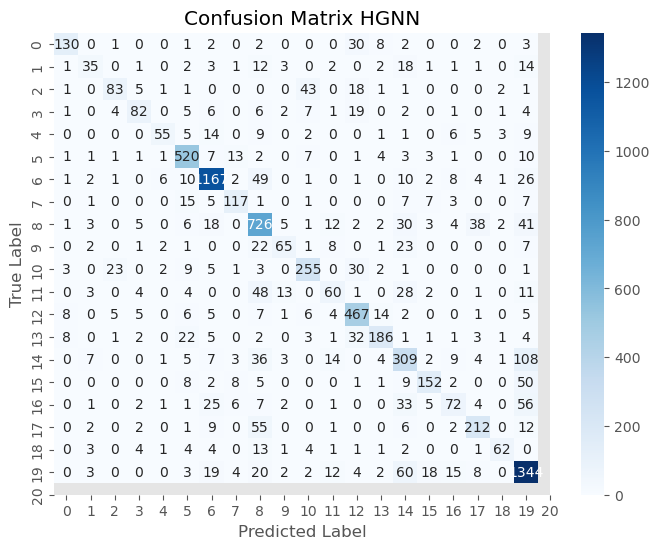

In [71]:
# Set a random seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)



# Model evaluation on testing data
model.eval()
with torch.no_grad():
    output = model(test_x, test_edges)
    _, predicted = torch.max(output, dim=1)
    correct = (predicted == test_y).sum().item()
    total = test_y.size(0)
    accuracy = correct / total * 100

print('Testing Accuracy:', accuracy, '%')

# Calculate the confusion matrix
cm = confusion_matrix(test_y.numpy(), predicted.numpy())

# Get the class labels
class_labels = [str(i) for i in range(num_classes)]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix HGNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Testing Accuracy: 76.66876178504086 %


/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


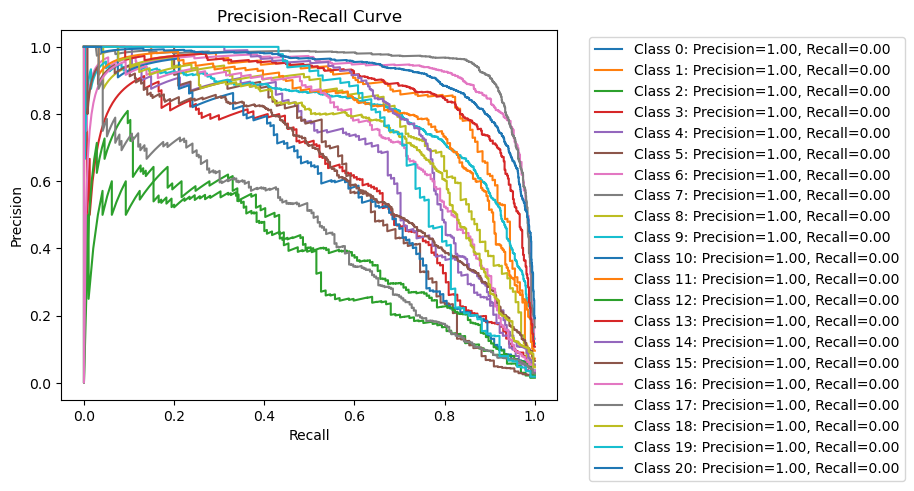

In [11]:
# Set a random seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)



# Model evaluation on testing data
model.eval()
with torch.no_grad():
    output = model(test_x, test_edges)
    _, predicted = torch.max(output, dim=1)
    correct = (predicted == test_y).sum().item()
    total = test_y.size(0)
    accuracy = correct / total * 100

print('Testing Accuracy:', accuracy, '%')

# Calculate precision and recall for each class
precision = dict()
recall = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(test_y.numpy() == i, output[:, i])

plt.figure()
for i in range(num_classes):
    plt.plot(recall[i], precision[i], label='Class {}: Precision={:.2f}, Recall={:.2f}'.format(i, precision[i][-1], recall[i][-1]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


## LinkPredictor <a class="anchor" id="section_4_5"></a>

### LinkPredictor: first model <a class="anchor" id="section_4_5_1"></a>

In [72]:
torch.manual_seed(42)
random.seed(42)

class HGNN_conv(nn.Module):
    def __init__(self, in_ft, out_ft, bias=True):
        super(HGNN_conv, self).__init__()

        self.weight = nn.Parameter(torch.Tensor(in_ft, out_ft))
        if bias:
            self.bias = nn.Parameter(torch.Tensor(out_ft))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, x: torch.Tensor):
        x = x.matmul(self.weight)
        if self.bias is not None:
            x = x + self.bias
        return x

class LinkPredictor(nn.Module):
    def __init__(self, num_nodes, hidden_size):
        super(LinkPredictor, self).__init__()
        self.embedding = nn.Embedding(num_nodes, hidden_size)
        self.fc1 = HGNN_conv(hidden_size, hidden_size)
        self.fc2 = HGNN_conv(hidden_size, 1)

    def forward(self, hyperedge_indices):
        embedded_nodes = self.embedding(hyperedge_indices.long())  # Convert to LongTensor
        aggregated_nodes = torch.mean(embedded_nodes, dim=1)
        hidden1 = torch.relu(self.fc1(aggregated_nodes))
        output = torch.sigmoid(self.fc2(hidden1))
        return output.view(-1)

edges = edges_cuisine

node_indices = set()
for edge in edges:
    node_indices.update(edge[:2])

num_nodes = max(node_indices) + 1

# Filter out edges with less than two elements
filtered_edges = [edge for edge in edges if len(edge) >= 2]

# Create hyperedges tensor
hyperedges = torch.tensor([[edge[0], edge[1]] for edge in filtered_edges], dtype=torch.float)

# Set hyperparameters
hidden_dim = 128
learning_rate = 0.1
num_epochs = 500

# Create an instance of the model
model = LinkPredictor(num_nodes, hidden_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Split positive samples for training and testing
num_samples = hyperedges.shape[0]
num_train_samples = int(0.7 * num_samples)

perm = torch.randperm(num_samples)
hyperedges = hyperedges[perm]

train_pos_samples = hyperedges[:num_train_samples]
test_pos_samples = hyperedges[num_train_samples:]

# Generate negative samples for training
train_neg_samples = torch.randint(0, num_nodes, train_pos_samples.size())
test_neg_samples = torch.randint(0, num_nodes, test_pos_samples.size())

# Training loop
for epoch in range(num_epochs):
    # Clear gradients
    optimizer.zero_grad()

    pos_out = model(train_pos_samples)
    neg_out = model(train_neg_samples)

    pos_label = torch.ones(train_pos_samples.shape[0])
    neg_label = torch.zeros(train_neg_samples.shape[0])

    pos_loss = criterion(pos_out, pos_label)
    neg_loss = criterion(neg_out, neg_label)

    # Total loss
    loss = pos_loss + neg_loss

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    pos_predictions = (pos_out >= 0.5).float()
    neg_predictions = (neg_out >= 0.5).float()

    pos_acc = (pos_predictions == pos_label).float().mean()
    neg_acc = (neg_predictions == neg_label).float().mean()
    total_acc = (pos_acc + neg_acc) / 2

    # Print loss and accuracy for tracking training progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {total_acc.item()}")

# Evaluation
model.eval()
with torch.no_grad():
    pos_out = model(test_pos_samples)
    neg_out = model(test_neg_samples)

    pos_label = torch.ones(test_pos_samples.shape[0])
    neg_label = torch.zeros(test_neg_samples.shape[0])

    # Predict the specific link existence
    pos_predictions = (pos_out >= 0.5).float()
    neg_predictions = (neg_out >= 0.5).float()

    # Calculate accuracy for specific link prediction
    pos_acc = (pos_predictions == pos_label).float().mean()
    neg_acc = (neg_predictions == neg_label).float().mean()
    test_total_acc = (pos_acc + neg_acc) / 2

    print(f"Test Accuracy (Specific Link Prediction): {test_total_acc.item()}")

# Calculate additional metrics
train_loss = loss.item()
train_acc = total_acc.item()

test_loss = criterion(pos_out, pos_label).item()
test_acc = test_total_acc.item()

# Concatenate positive and negative samples
all_samples = torch.cat((test_pos_samples, test_neg_samples), dim=0)

# Concatenate positive and negative labels
all_labels = torch.cat((torch.ones(test_pos_samples.shape[0]), torch.zeros(test_neg_samples.shape[0])), dim=0)

# Generate model predictions
all_out = model(all_samples)

# Predict the specific link existence
all_predictions = (all_out >= 0.5).float()

# Calculate precision and recall
TP = ((all_predictions == 1) & (all_labels == 1)).float().sum()
FP = ((all_predictions == 1) & (all_labels == 0)).float().sum()
FN = ((all_predictions == 0) & (all_labels == 1)).float().sum()

precision = TP / (TP + FP)
recall = TP / (TP + FN)


print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_acc * 100}%")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc * 100}%")
print(f"Precision: {precision.item()}")
print(f"Recall: {recall.item()}")


Epoch [10/500], Loss: 2.610762596130371, Accuracy: 0.9454646706581116
Epoch [20/500], Loss: 1.3093446493148804, Accuracy: 0.9571084976196289
Epoch [30/500], Loss: 0.565519392490387, Accuracy: 0.9669194221496582
Epoch [40/500], Loss: 0.22163096070289612, Accuracy: 0.9704233407974243
Epoch [50/500], Loss: 0.14157868921756744, Accuracy: 0.9778264760971069
Epoch [60/500], Loss: 0.10835852473974228, Accuracy: 0.984582781791687
Epoch [70/500], Loss: 0.08795790374279022, Accuracy: 0.9894343614578247
Epoch [80/500], Loss: 0.07244227081537247, Accuracy: 0.9925788640975952
Epoch [90/500], Loss: 0.05999462306499481, Accuracy: 0.9951484203338623
Epoch [100/500], Loss: 0.051497314125299454, Accuracy: 0.9968733787536621
Epoch [110/500], Loss: 0.04607422649860382, Accuracy: 0.9977359175682068
Epoch [120/500], Loss: 0.041864506900310516, Accuracy: 0.9984187483787537
Epoch [130/500], Loss: 0.039243899285793304, Accuracy: 0.9987961053848267
Epoch [140/500], Loss: 0.03758265823125839, Accuracy: 0.9989937

### LinkPredictor: Parameters tuning <a class="anchor" id="section_4_5_2"></a>

In [23]:
torch.manual_seed(42)
random.seed(42)

class HGNN_conv(nn.Module):
    def __init__(self, in_ft, out_ft, bias=True):
        super(HGNN_conv, self).__init__()

        self.weight = nn.Parameter(torch.Tensor(in_ft, out_ft))
        if bias:
            self.bias = nn.Parameter(torch.Tensor(out_ft))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, x: torch.Tensor):
        x = x.matmul(self.weight)
        if self.bias is not None:
            x = x + self.bias
        return x

class LinkPredictor(nn.Module):
    def __init__(self, num_nodes, hidden_size):
        super(LinkPredictor, self).__init__()
        self.embedding = nn.Embedding(num_nodes, hidden_size)
        self.fc1 = HGNN_conv(hidden_size, hidden_size)
        self.fc2 = HGNN_conv(hidden_size, 1)

    def forward(self, hyperedge_indices):
        embedded_nodes = self.embedding(hyperedge_indices.long())  # Convert to LongTensor
        aggregated_nodes = torch.mean(embedded_nodes, dim=1)
        hidden1 = torch.relu(self.fc1(aggregated_nodes))
        output = torch.sigmoid(self.fc2(hidden1))
        return output.view(-1)

edges = edges_cuisine

node_indices = set()
for edge in edges:
    node_indices.update(edge[:2])

num_nodes = max(node_indices) + 1

# Filter out edges with less than two elements
filtered_edges = [edge for edge in edges if len(edge) >= 2]

# Create hyperedges tensor
hyperedges = torch.tensor([[edge[0], edge[1]] for edge in filtered_edges], dtype=torch.float)

# Set hyperparameters
hidden_dim_values = [64, 128, 256]
learning_rate_values = [0.001, 0.01, 0.1]
num_epochs_values = [200, 500, 1000]

best_accuracy = 0.0
best_params = {}

# Grid search parameter tuning
for hidden_dim, learning_rate, num_epochs in product(hidden_dim_values, learning_rate_values, num_epochs_values):
    # Create an instance of the model
    model = LinkPredictor(num_nodes, hidden_dim)

    # Define loss function and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Split positive samples for training and testing
    num_samples = hyperedges.shape[0]
    num_train_samples = int(0.7 * num_samples)

    perm = torch.randperm(num_samples)
    hyperedges = hyperedges[perm]

    train_pos_samples = hyperedges[:num_train_samples]
    test_pos_samples = hyperedges[num_train_samples:]

    # Generate negative samples for training
    train_neg_samples = torch.randint(0, num_nodes, train_pos_samples.size())
    test_neg_samples = torch.randint(0, num_nodes, test_pos_samples.size())

    # Training loop
    for epoch in range(num_epochs):
        # Clear gradients
        optimizer.zero_grad()

        pos_out = model(train_pos_samples)
        neg_out = model(train_neg_samples)

        pos_label = torch.ones(train_pos_samples.shape[0])
        neg_label = torch.zeros(train_neg_samples.shape[0])

        pos_loss = criterion(pos_out, pos_label)
        neg_loss = criterion(neg_out, neg_label)

        # Total loss
        loss = pos_loss + neg_loss

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        pos_predictions = (pos_out >= 0.5).float()
        neg_predictions = (neg_out >= 0.5).float()

        pos_acc = (pos_predictions == pos_label).float().mean()
        neg_acc = (neg_predictions == neg_label).float().mean()
        total_acc = (pos_acc + neg_acc) / 2

        # Print loss and accuracy for tracking training progress
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {total_acc.item()}")

    # Evaluation
    model.eval()
    with torch.no_grad():
        pos_out = model(test_pos_samples)
        neg_out = model(test_neg_samples)

        pos_label = torch.ones(test_pos_samples.shape[0])
        neg_label = torch.zeros(test_neg_samples.shape[0])

        # Predict the specific link existence
        pos_predictions = (pos_out >= 0.5).float()
        neg_predictions = (neg_out >= 0.5).float()

        # Calculate accuracy for specific link prediction
        pos_acc = (pos_predictions == pos_label).float().mean()
        neg_acc = (neg_predictions == neg_label).float().mean()
        total_acc = (pos_acc + neg_acc) / 2

        print(f"Test Accuracy (Specific Link Prediction): {total_acc.item()}")

        # Check if current parameters yield better accuracy
        if total_acc > best_accuracy:
            best_accuracy = total_acc
            best_params = {
                'hidden_dim': hidden_dim,
                'learning_rate': learning_rate,
                'num_epochs': num_epochs
            }

print("Grid search finished.")
print("Best parameters:")
print(best_params)
print("Best accuracy:")
print(best_accuracy)


Epoch [10/200], Loss: 1.3620710372924805, Accuracy: 0.6100050210952759
Epoch [20/200], Loss: 1.1630024909973145, Accuracy: 0.6925177574157715
Epoch [30/200], Loss: 1.0494186878204346, Accuracy: 0.7394702434539795
Epoch [40/200], Loss: 0.9580980539321899, Accuracy: 0.7718501091003418
Epoch [50/200], Loss: 0.8816220760345459, Accuracy: 0.79869544506073
Epoch [60/200], Loss: 0.8152173757553101, Accuracy: 0.819557249546051
Epoch [70/200], Loss: 0.7551194429397583, Accuracy: 0.837472140789032
Epoch [80/200], Loss: 0.6999561786651611, Accuracy: 0.8524761199951172
Epoch [90/200], Loss: 0.6488358974456787, Accuracy: 0.8665456771850586
Epoch [100/200], Loss: 0.601419985294342, Accuracy: 0.8778480291366577
Epoch [110/200], Loss: 0.5574533939361572, Accuracy: 0.8887012004852295
Epoch [120/200], Loss: 0.5166757106781006, Accuracy: 0.8981887102127075
Epoch [130/200], Loss: 0.4789794385433197, Accuracy: 0.9077481627464294
Epoch [140/200], Loss: 0.44427984952926636, Accuracy: 0.9154747128486633
Epoch

### Second model

### LinkPredictor: Cuisine dataset <a class="anchor" id="section_4_5_3"></a>

In [73]:
torch.manual_seed(42)
random.seed(42)

class HGNN_conv(nn.Module):
    def __init__(self, in_ft, out_ft, bias=True):
        super(HGNN_conv, self).__init__()

        self.weight = nn.Parameter(torch.Tensor(in_ft, out_ft))
        if bias:
            self.bias = nn.Parameter(torch.Tensor(out_ft))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, x: torch.Tensor):
        x = x.matmul(self.weight)
        if self.bias is not None:
            x = x + self.bias
        return x

class LinkPredictor(nn.Module):
    def __init__(self, num_nodes, hidden_size):
        super(LinkPredictor, self).__init__()
        self.embedding = nn.Embedding(num_nodes, hidden_size)
        self.fc1 = HGNN_conv(hidden_size, hidden_size)
        self.fc2 = HGNN_conv(hidden_size, 1)

    def forward(self, hyperedge_indices):
        embedded_nodes = self.embedding(hyperedge_indices.long())  # Convert to LongTensor
        aggregated_nodes = torch.mean(embedded_nodes, dim=1)
        hidden1 = torch.relu(self.fc1(aggregated_nodes))
        output = torch.sigmoid(self.fc2(hidden1))
        return output.view(-1)

edges = edges_cuisine

node_indices = set()
for edge in edges:
    node_indices.update(edge[:2])

num_nodes = max(node_indices) + 1

# Filter out edges with less than two elements
filtered_edges = [edge for edge in edges if len(edge) >= 2]

# Create hyperedges tensor
hyperedges = torch.tensor([[edge[0], edge[1]] for edge in filtered_edges], dtype=torch.float)

# Set hyperparameters
hidden_dim = 256
learning_rate = 0.01
num_epochs = 200

# Create an instance of the model
model = LinkPredictor(num_nodes, hidden_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Split positive samples for training and testing
num_samples = hyperedges.shape[0]
num_train_samples = int(0.7 * num_samples)

perm = torch.randperm(num_samples)
hyperedges = hyperedges[perm]

train_pos_samples = hyperedges[:num_train_samples]
test_pos_samples = hyperedges[num_train_samples:]

# Generate negative samples for training
train_neg_samples = torch.randint(0, num_nodes, train_pos_samples.size())
test_neg_samples = torch.randint(0, num_nodes, test_pos_samples.size())

# Training loop
for epoch in range(num_epochs):
    # Clear gradients
    optimizer.zero_grad()

    pos_out = model(train_pos_samples)
    neg_out = model(train_neg_samples)

    pos_label = torch.ones(train_pos_samples.shape[0])
    neg_label = torch.zeros(train_neg_samples.shape[0])

    pos_loss = criterion(pos_out, pos_label)
    neg_loss = criterion(neg_out, neg_label)

    # Total loss
    loss = pos_loss + neg_loss

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    pos_predictions = (pos_out >= 0.5).float()
    neg_predictions = (neg_out >= 0.5).float()

    pos_acc = (pos_predictions == pos_label).float().mean()
    neg_acc = (neg_predictions == neg_label).float().mean()
    total_acc = (pos_acc + neg_acc) / 2

    # Print loss and accuracy for tracking training progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {total_acc.item()}")

# Evaluation
model.eval()
with torch.no_grad():
    pos_out = model(test_pos_samples)
    neg_out = model(test_neg_samples)

    pos_label = torch.ones(test_pos_samples.shape[0])
    neg_label = torch.zeros(test_neg_samples.shape[0])

    # Predict the specific link existence
    pos_predictions = (pos_out >= 0.5).float()
    neg_predictions = (neg_out >= 0.5).float()

    # Calculate accuracy for specific link prediction
    pos_acc = (pos_predictions == pos_label).float().mean()
    neg_acc = (neg_predictions == neg_label).float().mean()
    test_total_acc = (pos_acc + neg_acc) / 2

    print(f"Test Accuracy (Specific Link Prediction): {test_total_acc.item()}")

# Calculate additional metrics
train_loss = loss.item()
train_acc = total_acc.item()

test_loss = criterion(pos_out, pos_label).item()
test_acc = test_total_acc.item()

# Concatenate positive and negative samples
all_samples = torch.cat((test_pos_samples, test_neg_samples), dim=0)

# Concatenate positive and negative labels
all_labels = torch.cat((torch.ones(test_pos_samples.shape[0]), torch.zeros(test_neg_samples.shape[0])), dim=0)

# Generate model predictions
all_out = model(all_samples)

# Predict the specific link existence
all_predictions = (all_out >= 0.5).float()

# Calculate precision and recall
TP = ((all_predictions == 1) & (all_labels == 1)).float().sum()
FP = ((all_predictions == 1) & (all_labels == 0)).float().sum()
FN = ((all_predictions == 0) & (all_labels == 1)).float().sum()

precision = TP / (TP + FP)
recall = TP / (TP + FN)


print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_acc * 100}%")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc * 100}%")
print(f"Precision: {precision.item()}")
print(f"Recall: {recall.item()}")


Epoch [10/200], Loss: 0.4574672281742096, Accuracy: 0.9196435213088989
Epoch [20/200], Loss: 0.18718641996383667, Accuracy: 0.9662725329399109
Epoch [30/200], Loss: 0.08723367750644684, Accuracy: 0.9870444536209106
Epoch [40/200], Loss: 0.04180340841412544, Accuracy: 0.9977179765701294
Epoch [50/200], Loss: 0.024330120533704758, Accuracy: 0.9991554617881775
Epoch [60/200], Loss: 0.01615631952881813, Accuracy: 0.9993351697921753
Epoch [70/200], Loss: 0.011937381699681282, Accuracy: 0.9994609355926514
Epoch [80/200], Loss: 0.009542416781187057, Accuracy: 0.9994789361953735
Epoch [90/200], Loss: 0.00800498016178608, Accuracy: 0.9994789361953735
Epoch [100/200], Loss: 0.006936614867299795, Accuracy: 0.9994789361953735
Epoch [110/200], Loss: 0.006145261228084564, Accuracy: 0.9994789361953735
Epoch [120/200], Loss: 0.005532943177968264, Accuracy: 0.9994789361953735
Epoch [130/200], Loss: 0.005044739693403244, Accuracy: 0.9994789361953735
Epoch [140/200], Loss: 0.004646776709705591, Accuracy:

### LinkPredictor: Emergency room <a class="anchor" id="section_4_5_4"></a>

In [74]:
torch.manual_seed(42)
random.seed(42)

class HGNN_conv(nn.Module):
    def __init__(self, in_ft, out_ft, bias=True):
        super(HGNN_conv, self).__init__()

        self.weight = nn.Parameter(torch.Tensor(in_ft, out_ft))
        if bias:
            self.bias = nn.Parameter(torch.Tensor(out_ft))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, x: torch.Tensor):
        x = x.matmul(self.weight)
        if self.bias is not None:
            x = x + self.bias
        return x

class LinkPredictor(nn.Module):
    def __init__(self, num_nodes, hidden_size):
        super(LinkPredictor, self).__init__()
        self.embedding = nn.Embedding(num_nodes, hidden_size)
        self.fc1 = HGNN_conv(hidden_size, hidden_size)
        self.fc2 = HGNN_conv(hidden_size, 1)

    def forward(self, hyperedge_indices):
        embedded_nodes = self.embedding(hyperedge_indices.long())  # Convert to LongTensor
        aggregated_nodes = torch.mean(embedded_nodes, dim=1)
        hidden1 = torch.relu(self.fc1(aggregated_nodes))
        output = torch.sigmoid(self.fc2(hidden1))
        return output.view(-1)

edges = edges_dawn

node_indices = set()
for edge in edges:
    node_indices.update(edge[:2])

num_nodes = max(node_indices) + 1

# Filter out edges with less than two elements
filtered_edges = [edge for edge in edges if len(edge) >= 2]

# Create hyperedges tensor
hyperedges = torch.tensor([[edge[0], edge[1]] for edge in filtered_edges], dtype=torch.float)

# Set hyperparameters
hidden_dim = 256
learning_rate = 0.01
num_epochs = 200

# Create an instance of the model
model = LinkPredictor(num_nodes, hidden_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Split positive samples for training and testing
num_samples = hyperedges.shape[0]
num_train_samples = int(0.7 * num_samples)

perm = torch.randperm(num_samples)
hyperedges = hyperedges[perm]

train_pos_samples = hyperedges[:num_train_samples]
test_pos_samples = hyperedges[num_train_samples:]

# Generate negative samples for training
train_neg_samples = torch.randint(0, num_nodes, train_pos_samples.size())
test_neg_samples = torch.randint(0, num_nodes, test_pos_samples.size())

# Training loop
for epoch in range(num_epochs):
    # Clear gradients
    optimizer.zero_grad()

    pos_out = model(train_pos_samples)
    neg_out = model(train_neg_samples)

    pos_label = torch.ones(train_pos_samples.shape[0])
    neg_label = torch.zeros(train_neg_samples.shape[0])

    pos_loss = criterion(pos_out, pos_label)
    neg_loss = criterion(neg_out, neg_label)

    # Total loss
    loss = pos_loss + neg_loss

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    pos_predictions = (pos_out >= 0.5).float()
    neg_predictions = (neg_out >= 0.5).float()

    pos_acc = (pos_predictions == pos_label).float().mean()
    neg_acc = (neg_predictions == neg_label).float().mean()
    total_acc = (pos_acc + neg_acc) / 2

    # Print loss and accuracy for tracking training progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {total_acc.item()}")

# Evaluation
model.eval()
with torch.no_grad():
    pos_out = model(test_pos_samples)
    neg_out = model(test_neg_samples)

    pos_label = torch.ones(test_pos_samples.shape[0])
    neg_label = torch.zeros(test_neg_samples.shape[0])

    # Predict the specific link existence
    pos_predictions = (pos_out >= 0.5).float()
    neg_predictions = (neg_out >= 0.5).float()

    # Calculate accuracy for specific link prediction
    pos_acc = (pos_predictions == pos_label).float().mean()
    neg_acc = (neg_predictions == neg_label).float().mean()
    test_total_acc = (pos_acc + neg_acc) / 2

    print(f"Test Accuracy (Specific Link Prediction): {test_total_acc.item()}")

# Calculate additional metrics
train_loss = loss.item()
train_acc = total_acc.item()

test_loss = criterion(pos_out, pos_label).item()
test_acc = test_total_acc.item()

# Concatenate positive and negative samples
all_samples = torch.cat((test_pos_samples, test_neg_samples), dim=0)

# Concatenate positive and negative labels
all_labels = torch.cat((torch.ones(test_pos_samples.shape[0]), torch.zeros(test_neg_samples.shape[0])), dim=0)

# Generate model predictions
all_out = model(all_samples)

# Predict the specific link existence
all_predictions = (all_out >= 0.5).float()

# Calculate precision and recall
TP = ((all_predictions == 1) & (all_labels == 1)).float().sum()
FP = ((all_predictions == 1) & (all_labels == 0)).float().sum()
FN = ((all_predictions == 0) & (all_labels == 1)).float().sum()

precision = TP / (TP + FP)
recall = TP / (TP + FN)


print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_acc * 100}%")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc * 100}%")
print(f"Precision: {precision.item()}")
print(f"Recall: {recall.item()}")


Epoch [10/200], Loss: 0.9913649559020996, Accuracy: 0.9188811779022217
Epoch [20/200], Loss: 0.4434320330619812, Accuracy: 0.9429361820220947
Epoch [30/200], Loss: 0.2742374837398529, Accuracy: 0.9520870447158813
Epoch [40/200], Loss: 0.20313209295272827, Accuracy: 0.9620094299316406
Epoch [50/200], Loss: 0.1629655957221985, Accuracy: 0.9716609716415405
Epoch [60/200], Loss: 0.13515746593475342, Accuracy: 0.9786615967750549
Epoch [70/200], Loss: 0.11426194757223129, Accuracy: 0.9842506647109985
Epoch [80/200], Loss: 0.09764273464679718, Accuracy: 0.9883295297622681
Epoch [90/200], Loss: 0.08403714001178741, Accuracy: 0.9912922382354736
Epoch [100/200], Loss: 0.07273805141448975, Accuracy: 0.9932948350906372
Epoch [110/200], Loss: 0.06326135993003845, Accuracy: 0.9945341348648071
Epoch [120/200], Loss: 0.05530630052089691, Accuracy: 0.9954450726509094
Epoch [130/200], Loss: 0.04864318668842316, Accuracy: 0.9959293007850647
Epoch [140/200], Loss: 0.04305185005068779, Accuracy: 0.99629044

### LinkPredictor: Co-authorship dataset <a class="anchor" id="section_4_5_5"></a>

In [75]:
torch.manual_seed(42)
random.seed(42)

class HGNN_conv(nn.Module):
    def __init__(self, in_ft, out_ft, bias=True):
        super(HGNN_conv, self).__init__()

        self.weight = nn.Parameter(torch.Tensor(in_ft, out_ft))
        if bias:
            self.bias = nn.Parameter(torch.Tensor(out_ft))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, x: torch.Tensor):
        x = x.matmul(self.weight)
        if self.bias is not None:
            x = x + self.bias
        return x

class LinkPredictor(nn.Module):
    def __init__(self, num_nodes, hidden_size):
        super(LinkPredictor, self).__init__()
        self.embedding = nn.Embedding(num_nodes, hidden_size)
        self.fc1 = HGNN_conv(hidden_size, hidden_size)
        self.fc2 = HGNN_conv(hidden_size, 1)

    def forward(self, hyperedge_indices):
        embedded_nodes = self.embedding(hyperedge_indices.long())  # Convert to LongTensor
        aggregated_nodes = torch.mean(embedded_nodes, dim=1)
        hidden1 = torch.relu(self.fc1(aggregated_nodes))
        output = torch.sigmoid(self.fc2(hidden1))
        return output.view(-1)

edges = edges_papers

node_indices = set()
for edge in edges:
    node_indices.update(edge[:2])

num_nodes = max(node_indices) + 1

# Filter out edges with less than two elements
filtered_edges = [edge for edge in edges if len(edge) >= 2]

# Create hyperedges tensor
hyperedges = torch.tensor([[edge[0], edge[1]] for edge in filtered_edges], dtype=torch.float)

# Set hyperparameters
hidden_dim = 256
learning_rate = 0.01
num_epochs = 200

# Create an instance of the model
model = LinkPredictor(num_nodes, hidden_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Split positive samples for training and testing
num_samples = hyperedges.shape[0]
num_train_samples = int(0.7 * num_samples)

perm = torch.randperm(num_samples)
hyperedges = hyperedges[perm]

train_pos_samples = hyperedges[:num_train_samples]
test_pos_samples = hyperedges[num_train_samples:]

# Generate negative samples for training
train_neg_samples = torch.randint(0, num_nodes, train_pos_samples.size())
test_neg_samples = torch.randint(0, num_nodes, test_pos_samples.size())

# Training loop
for epoch in range(num_epochs):
    # Clear gradients
    optimizer.zero_grad()

    pos_out = model(train_pos_samples)
    neg_out = model(train_neg_samples)

    pos_label = torch.ones(train_pos_samples.shape[0])
    neg_label = torch.zeros(train_neg_samples.shape[0])

    pos_loss = criterion(pos_out, pos_label)
    neg_loss = criterion(neg_out, neg_label)

    # Total loss
    loss = pos_loss + neg_loss

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    pos_predictions = (pos_out >= 0.5).float()
    neg_predictions = (neg_out >= 0.5).float()

    pos_acc = (pos_predictions == pos_label).float().mean()
    neg_acc = (neg_predictions == neg_label).float().mean()
    total_acc = (pos_acc + neg_acc) / 2

    # Print loss and accuracy for tracking training progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {total_acc.item()}")

# Evaluation
model.eval()
with torch.no_grad():
    pos_out = model(test_pos_samples)
    neg_out = model(test_neg_samples)

    pos_label = torch.ones(test_pos_samples.shape[0])
    neg_label = torch.zeros(test_neg_samples.shape[0])

    # Predict the specific link existence
    pos_predictions = (pos_out >= 0.5).float()
    neg_predictions = (neg_out >= 0.5).float()

    # Calculate accuracy for specific link prediction
    pos_acc = (pos_predictions == pos_label).float().mean()
    neg_acc = (neg_predictions == neg_label).float().mean()
    test_total_acc = (pos_acc + neg_acc) / 2

    print(f"Test Accuracy (Specific Link Prediction): {test_total_acc.item()}")

# Calculate additional metrics
train_loss = loss.item()
train_acc = total_acc.item()

test_loss = criterion(pos_out, pos_label).item()
test_acc = test_total_acc.item()

# Concatenate positive and negative samples
all_samples = torch.cat((test_pos_samples, test_neg_samples), dim=0)

# Concatenate positive and negative labels
all_labels = torch.cat((torch.ones(test_pos_samples.shape[0]), torch.zeros(test_neg_samples.shape[0])), dim=0)

# Generate model predictions
all_out = model(all_samples)

# Predict the specific link existence
all_predictions = (all_out >= 0.5).float()

# Calculate precision and recall
TP = ((all_predictions == 1) & (all_labels == 1)).float().sum()
FP = ((all_predictions == 1) & (all_labels == 0)).float().sum()
FN = ((all_predictions == 0) & (all_labels == 1)).float().sum()

precision = TP / (TP + FP)
recall = TP / (TP + FN)


print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_acc * 100}%")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc * 100}%")
print(f"Precision: {precision.item()}")
print(f"Recall: {recall.item()}")


Epoch [10/200], Loss: 0.7818107008934021, Accuracy: 0.8248857259750366
Epoch [20/200], Loss: 0.21328012645244598, Accuracy: 0.9820356965065002
Epoch [30/200], Loss: 0.06217005103826523, Accuracy: 0.9987335205078125
Epoch [40/200], Loss: 0.018158378079533577, Accuracy: 0.999903678894043
Epoch [50/200], Loss: 0.008663601242005825, Accuracy: 0.9999862313270569
Epoch [60/200], Loss: 0.0052221775986254215, Accuracy: 0.9999862313270569
Epoch [70/200], Loss: 0.0037388394121080637, Accuracy: 0.9999862313270569
Epoch [80/200], Loss: 0.002953917719423771, Accuracy: 0.9999862313270569
Epoch [90/200], Loss: 0.002460045274347067, Accuracy: 0.9999862313270569
Epoch [100/200], Loss: 0.0021092065144330263, Accuracy: 0.9999862313270569
Epoch [110/200], Loss: 0.0018402179703116417, Accuracy: 0.9999862313270569
Epoch [120/200], Loss: 0.0016244531143456697, Accuracy: 0.9999862313270569
Epoch [130/200], Loss: 0.0014465001877397299, Accuracy: 0.9999862313270569
Epoch [140/200], Loss: 0.0012971267569810152, 

# Project Spillover: loops DFS alghoritm 

In [15]:
def preprocess_data(edges, num_vertices):
    global hypergraph, visited, vistime, timer

    hypergraph = [[] for _ in range(num_vertices)]
    visited = [0] * num_vertices
    vistime = [0] * num_vertices
    timer = 0

    for edge in edges:
        for vertex in edge:
            if vertex >= num_vertices:
                hypergraph.extend([] for _ in range(vertex - num_vertices + 1))
                visited.extend([0] * (vertex - num_vertices + 1))
                vistime.extend([0] * (vertex - num_vertices + 1))
                num_vertices = vertex + 1
        for i in range(len(edge) - 1):
            vertex1 = edge[i]
            vertex2 = edge[i + 1]
            hypergraph[vertex1].append(vertex2)
            hypergraph[vertex2].append(vertex1)


In [16]:
#based on https://www.codingninjas.com/studio/library/count-of-simple-cycles-in-a-connected-undirected-graph-having-n-vertices
def dfs(vertex, parent, cycle_count):
    global timer, visited, vistime, hypergraph

    visited[vertex] = 1
    vistime[vertex] = timer
    timer += 1

    for child in hypergraph[vertex]:
        if child == parent:
            continue
        if not visited[child]:
            dfs(child, vertex, cycle_count)
        else:
            if child != parent and vistime[child] < vistime[vertex]:
                cycle_count[0] += 1


In [17]:
def calculate_num_vertices(edges):
    num_vertices = max(max(edge) for edge in edges) + 1
    return num_vertices

## Test data

In [35]:
test_1 = [[0, 1], [1, 2], [2, 0], [5, 1], [5, 0], [3, 0], [3, 2], [4, 2], [4, 1]] #4
test_2 = [[1, 2], [2, 3], [3, 4], [4, 5], [5, 2], [5, 6], [5, 7], [6, 7]] #2

In [36]:
# Calculate the number of vertices for each test dataset
num_vertices_test_1 = calculate_num_vertices(test_1)
num_vertices_test_2 = calculate_num_vertices(test_2)

# Test the preprocess_data function for test_1
preprocess_data(test_1, num_vertices_test_1)


# Test the dfs function for test_1
cycle_count = [0]
dfs(0, -1, cycle_count)
print("Test 1 - The number of cycles present is", cycle_count[0])

# Test the preprocess_data function for test_2
preprocess_data(test_2, num_vertices_test_2)


# Test the dfs function for test_2
cycle_count = [0]
dfs(1, -1, cycle_count)
print("Test 2 - The number of cycles present is", cycle_count[0])


Test 1 - The number of cycles present is 4
Test 2 - The number of cycles present is 2
